In [1]:
# All imports for the project

import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')

import pickle
import importlib.util
package_name = 'scikit-misc'
spec = importlib.util.find_spec(package_name)
if spec is None:
    import os
os.system(f"pip install scikit-misc")

import scipy
import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

In [2]:
# Upload our train and test data

test = pd.read_csv ('/Users/erjonhome/Desktop/test.csv')
train = pd.read_csv ('/Users/erjonhome/Desktop/train.csv')

In [3]:
# ********* PART 1: DATA PREPROCESSING ********* 
# **********************************************
# **********************************************

In [4]:
# Summary of Train and Test

#train.shape
#test.shape
#display(train)
#display(test)

# Train has 1460 samples with 81 features, and Test has 1459 samples with 80 features, it doesn't include Sales Price.

In [5]:
# We want to clean our train and test data together so that we can use the test data later on.
clean_train = train
clean_test = test
clean_train= clean_train.drop(['Id'], axis=1)
clean_test = clean_test.drop(['Id'], axis=1)
#display(clean_train)

In [6]:
# Figure out Numerical and Categorical Features

def define_features(df):
    
    numerical_feat = []
    categorical_feat = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            numerical_feat.append(col)
                
        if is_object_dtype(df[col]):
            categorical_feat.append(col)
            
    return numerical_feat, categorical_feat


In [7]:
all_features = clean_train.drop(['SalePrice'], axis=1)
numerical_feat, categorical_feat = define_features(all_features)

# Manually make MSSubClass and MoSold Categorical because SubClass has numbers that correlate to different classes like Duplex etc, and MoSold correlates to months of the year.
categorical_feat.append('MSSubClass')
categorical_feat.append('MoSold')
numerical_feat.remove('MoSold')
numerical_feat.remove('MSSubClass')

In [8]:
#len(categorical_feat)
#len(numerical_feat)
# There are 45 categorical and 34 numerical features. 

In [13]:
# Group these lots
grouped_lots = clean_train.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})
grouped_lots

,LotFrontage
LotConfig,
Corner,84.039801
CulDSac,59.911111
FR2,63.515152
FR3,70.750000
Inside,67.715686


In [14]:
#replace np.nan with average for lot_config of that type

clean_train.loc[(clean_train['LotFrontage'].isna()) & (clean_train['LotConfig'] == 'Corner'), 'LotFrontage'] = 84.03
clean_train.loc[(clean_train['LotFrontage'].isna()) & (clean_train['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 59.91        
clean_train.loc[(clean_train['LotFrontage'].isna()) & (clean_train['LotConfig'] == 'FR2'), 'LotFrontage'] = 63.52        
clean_train.loc[(clean_train['LotFrontage'].isna()) & (clean_train['LotConfig'] == 'FR3'), 'LotFrontage'] = 70.75        
clean_train.loc[(clean_train['LotFrontage'].isna()) & (clean_train['LotConfig'] == 'Inside'), 'LotFrontage'] = 67.71

In [56]:
# Deal with NA values in train
# We can handle them by imputing the missing/NA data values
# https://www.askpython.com/python/examples/impute-missing-data-values#:~:text=1.,particular%20data%20column%20or%20dataset.

In [57]:
def impute_null_values(df):
    cols = df.columns[df.isna().any()].to_list()
    for col in cols:
        if not is_numeric_dtype(df[col]):
            df[col].fillna('NotAvail', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    return df

clean_train = impute_null_values(clean_train)
clean_test = impute_null_values(clean_test)

print(clean_train.shape)
print(clean_test.shape)

#Verify there are no null values in either dataset
clean_train.isnull().values.any()
clean_test.isnull().values.any()

(1460, 80)
(1459, 79)


False

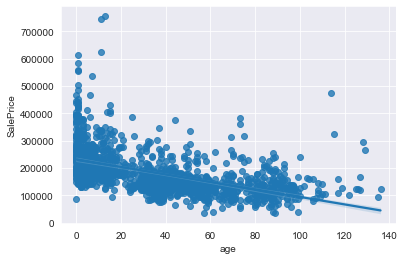

In [88]:
#age of house at time of sale
# age seems to have a negative correlation with sales price.
train['age'] = train['YrSold'] - train['YearBuilt'] 
sns.regplot(x=train['age'],y=train['SalePrice']);

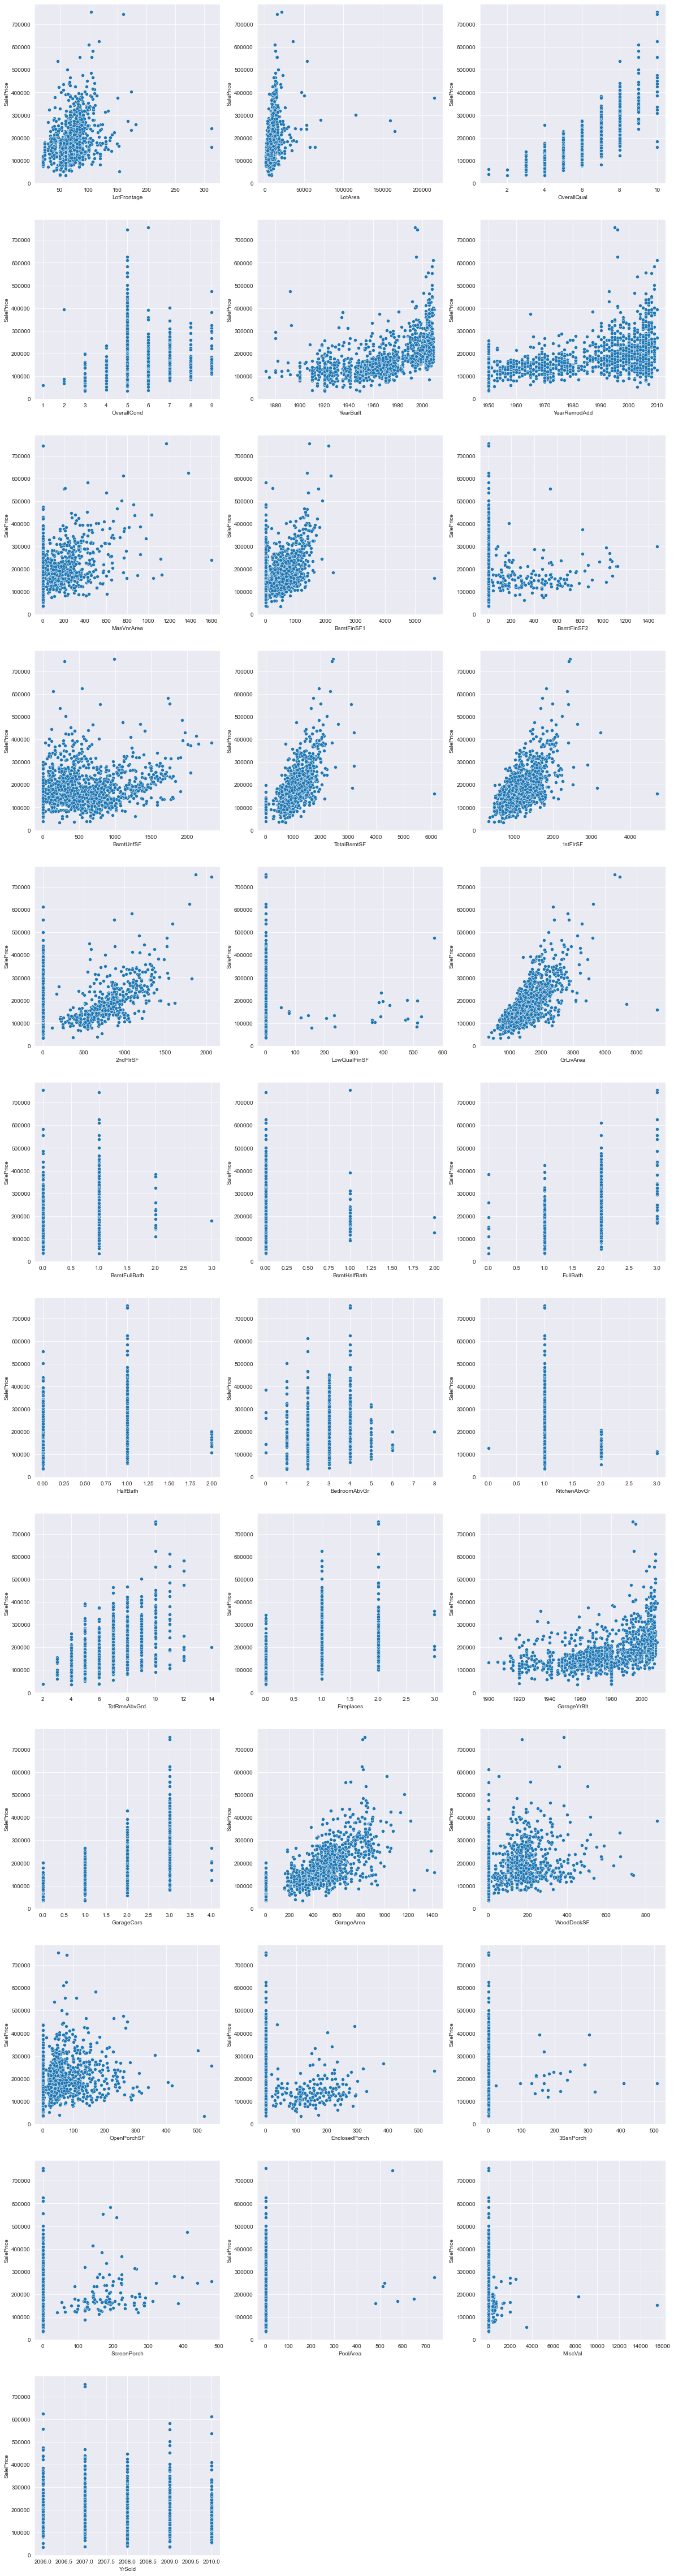

In [89]:
# Visualize our numerical features with scatterplots and our categorical features with bar charts to understand our data.

# Scatterplots of numerical features

plt.figure(figsize=(20,90))
for i in range(len(numerical_feat)):
    plt.subplot(13, 3, i+1)
    sns.scatterplot(x=clean_train[numerical_feat[i]], y=clean_train['SalePrice'])

plt.show()

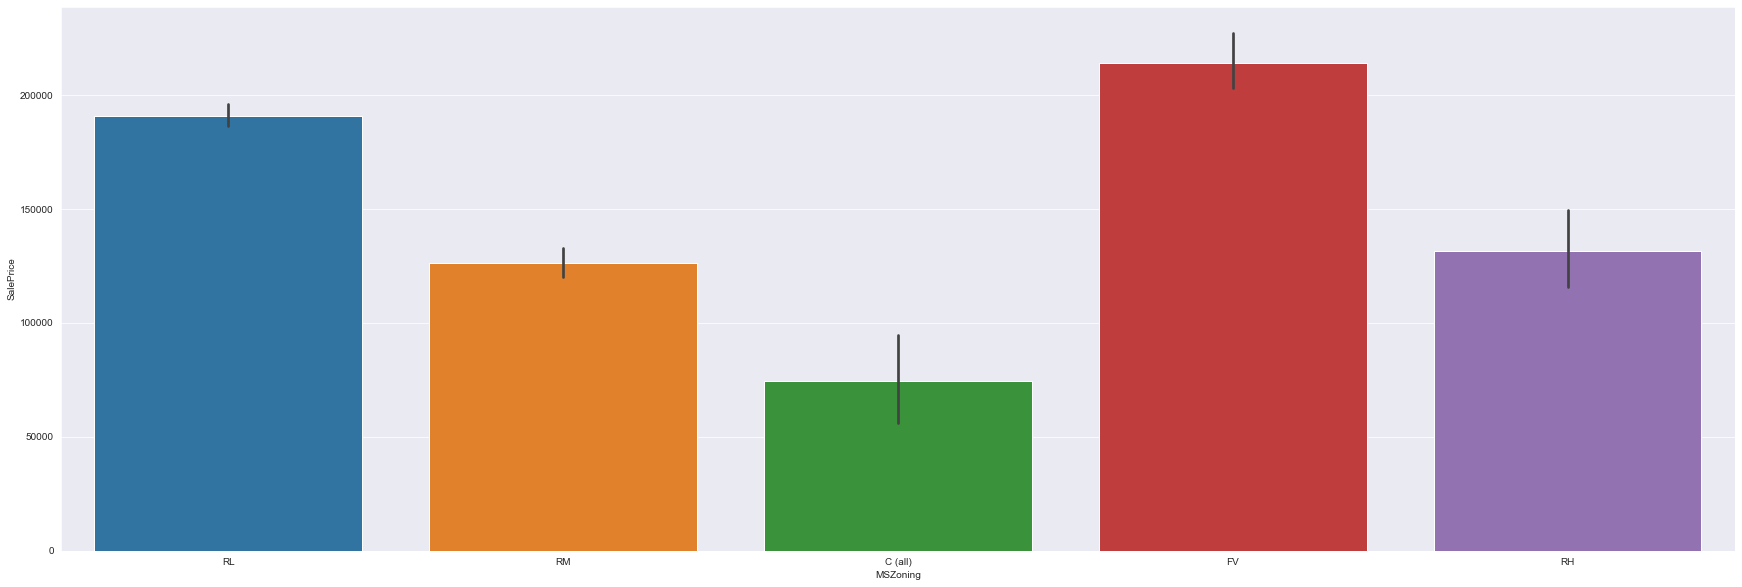

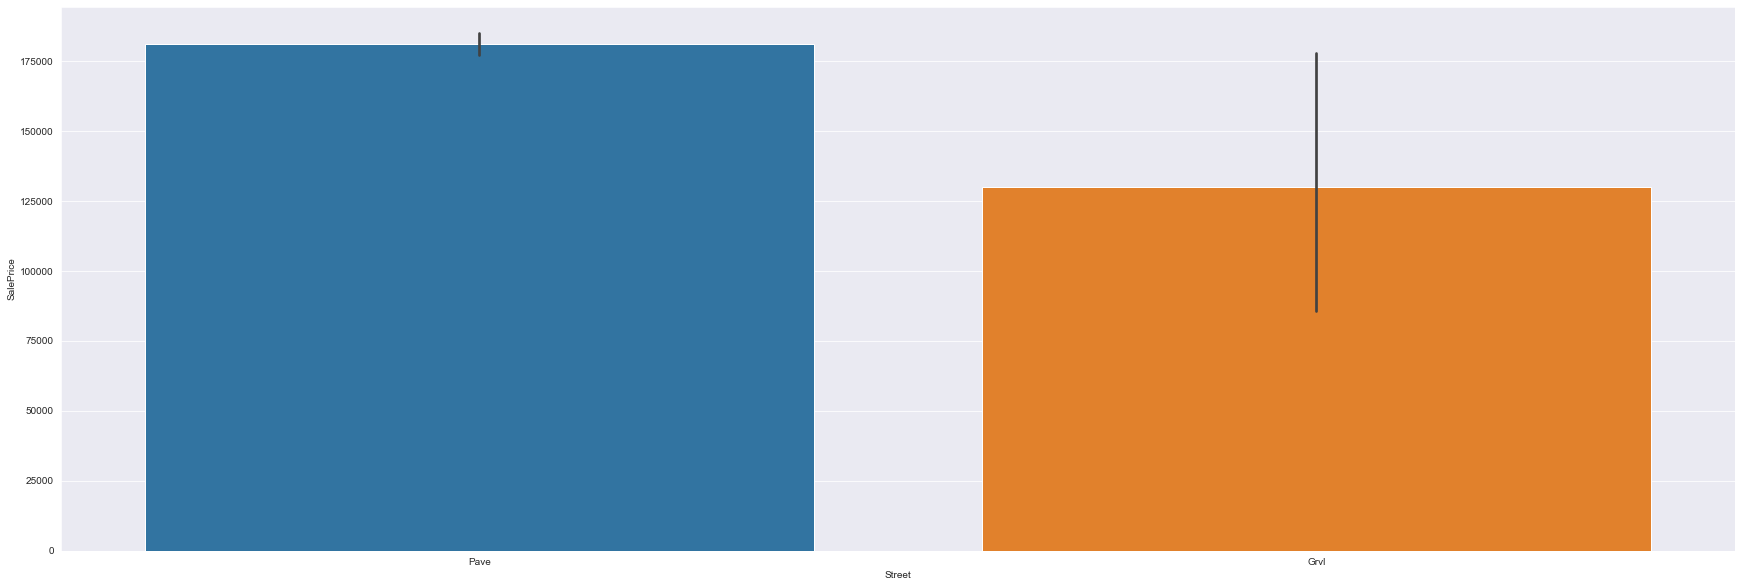

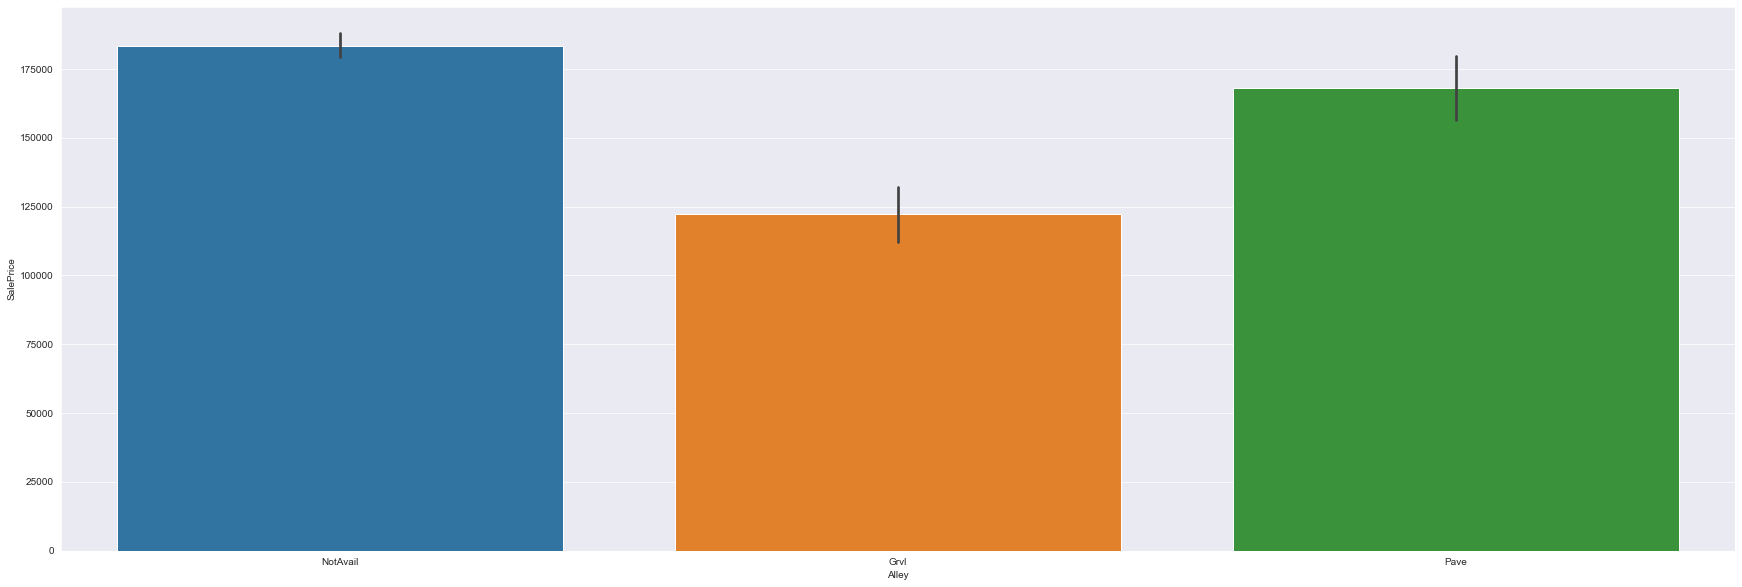

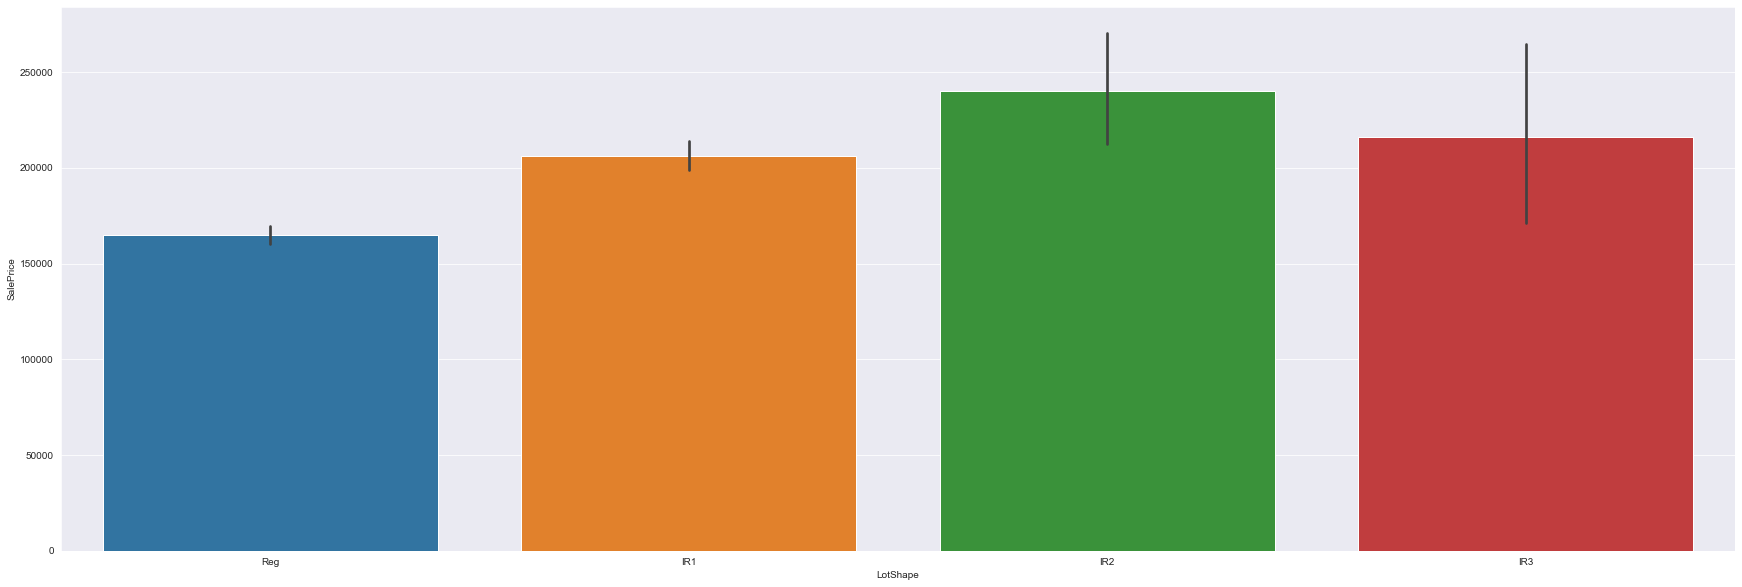

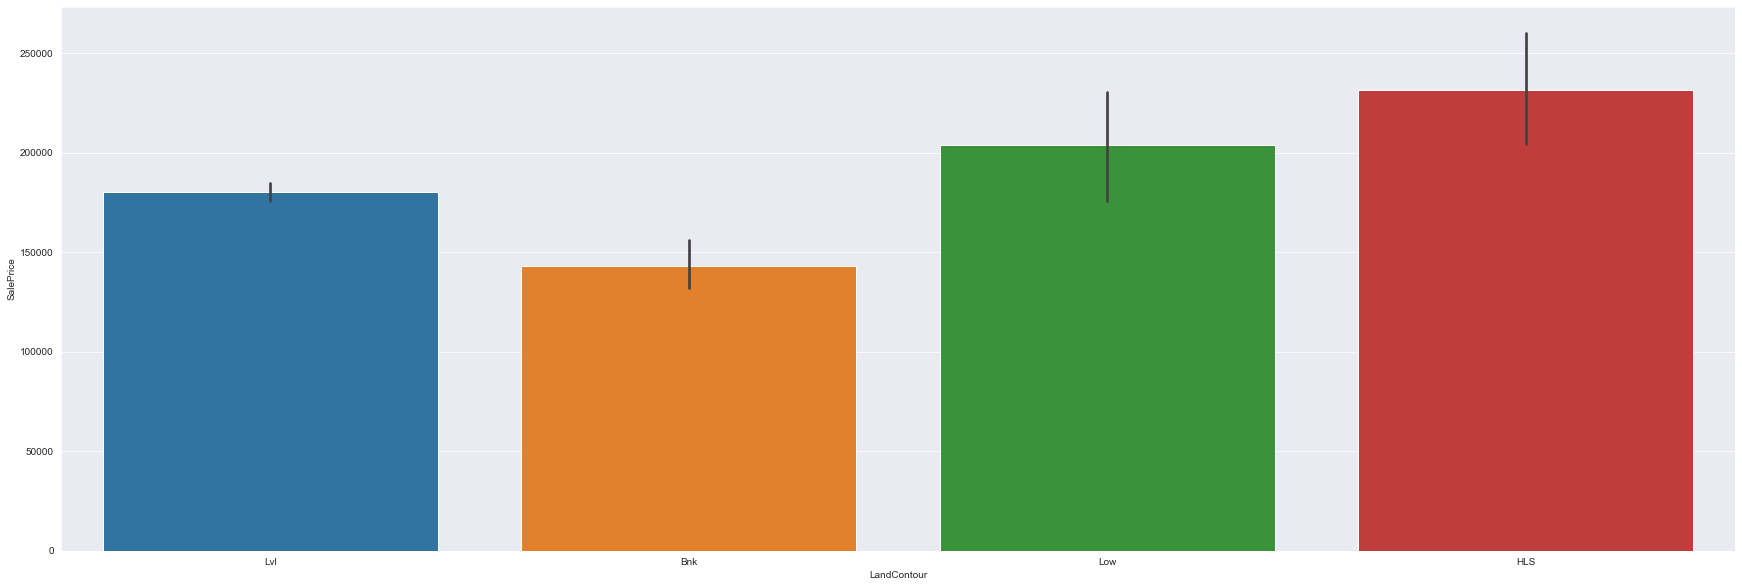

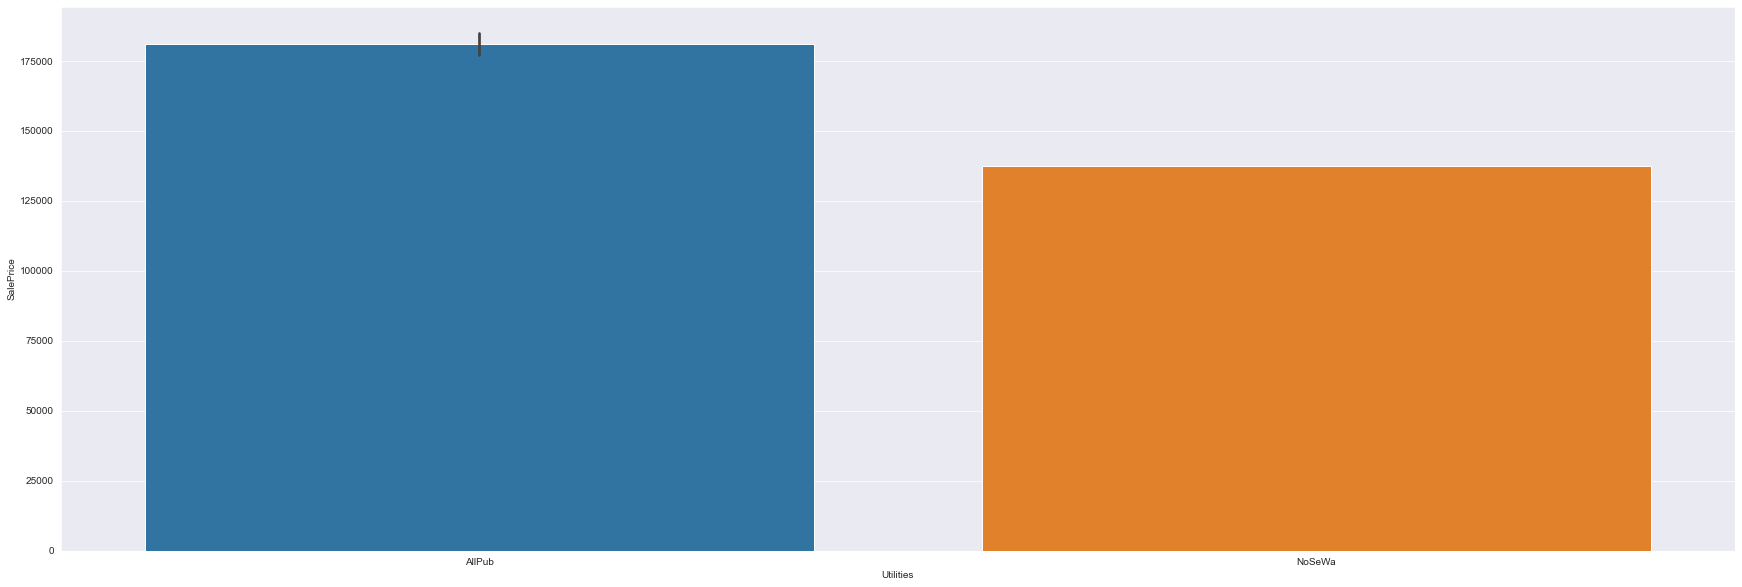

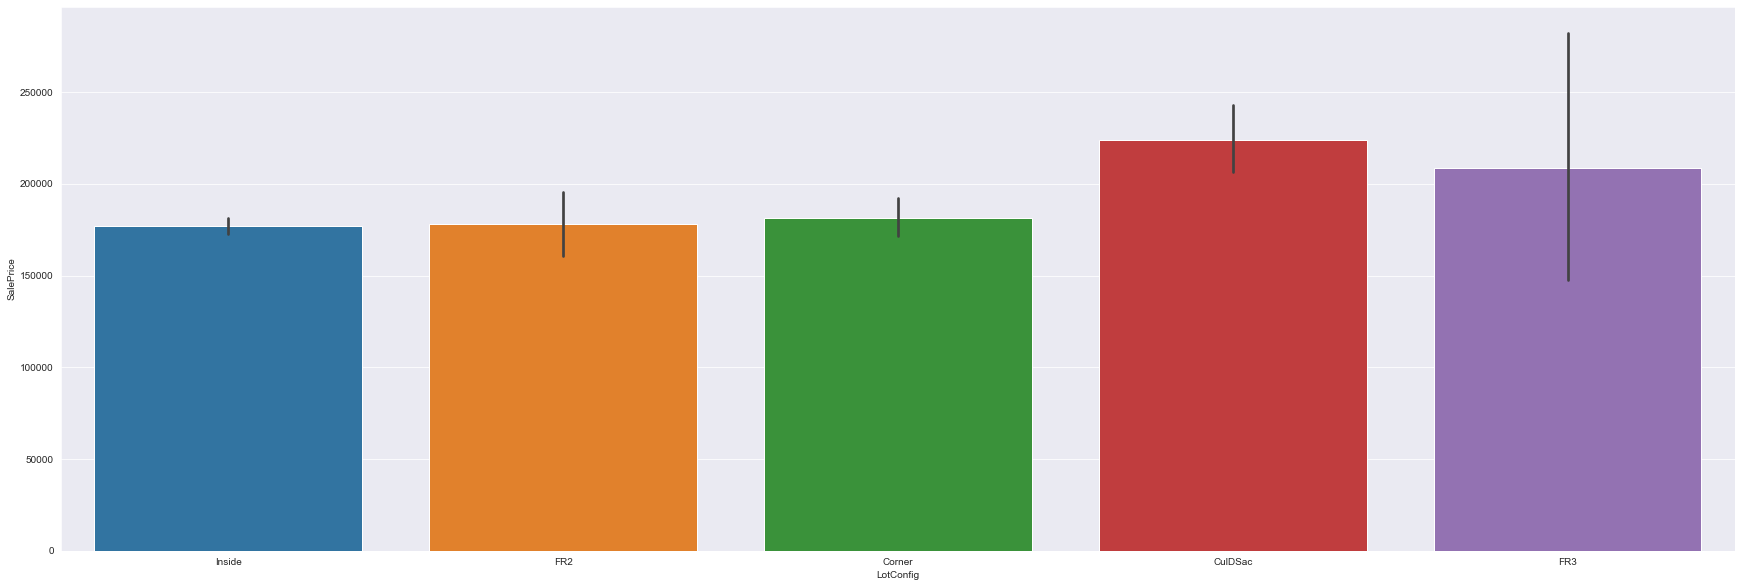

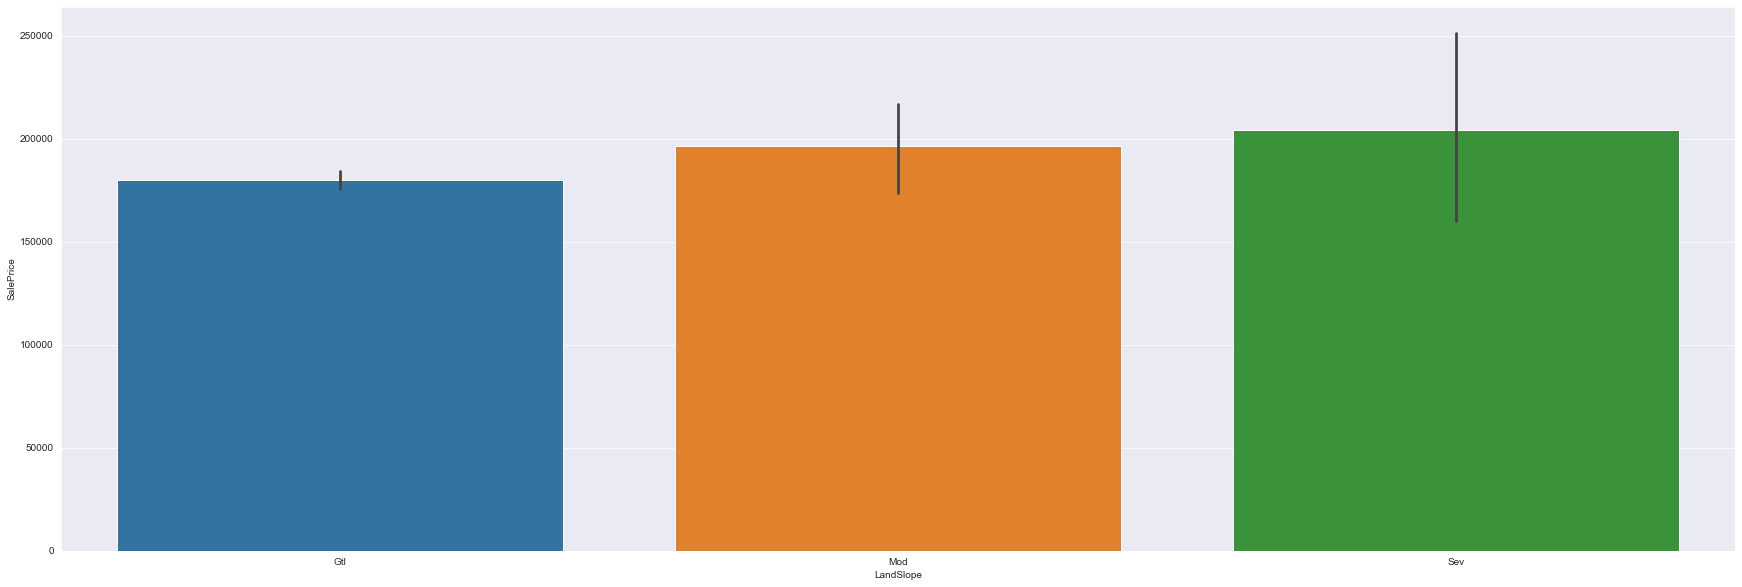

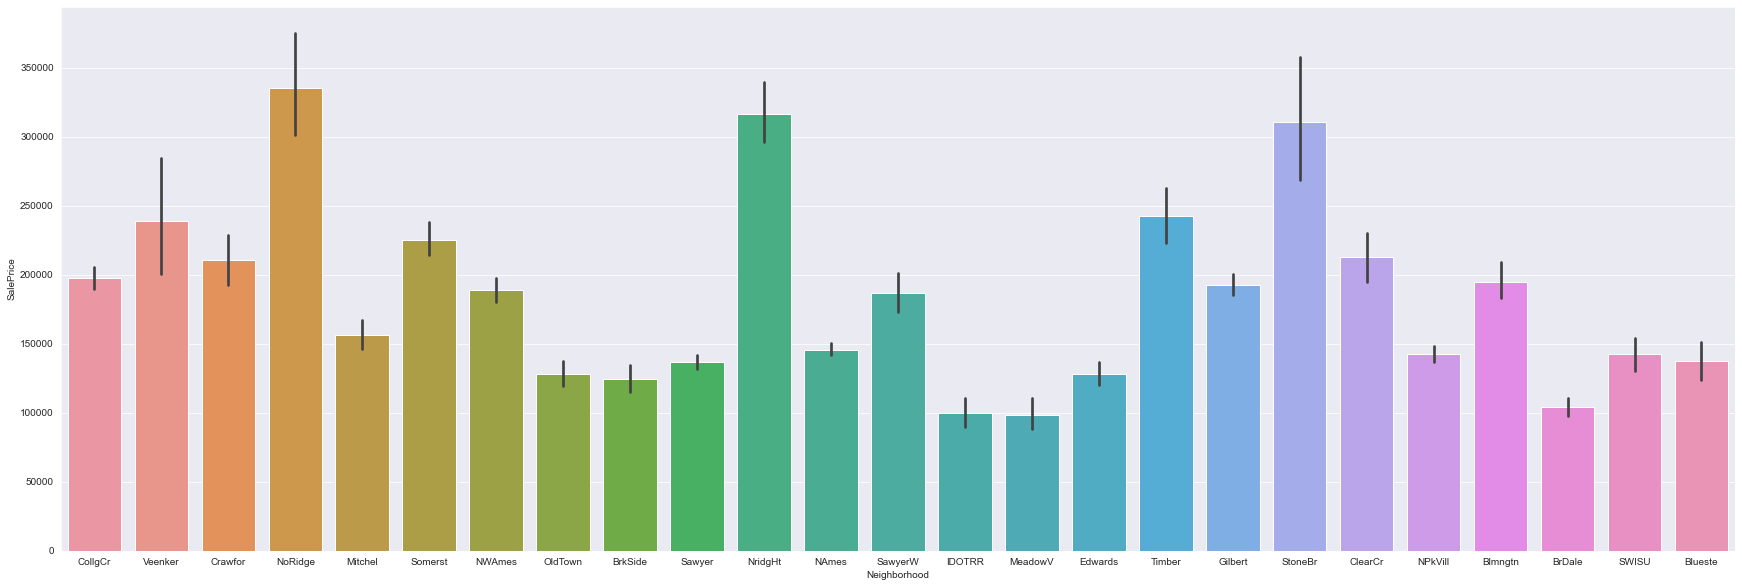

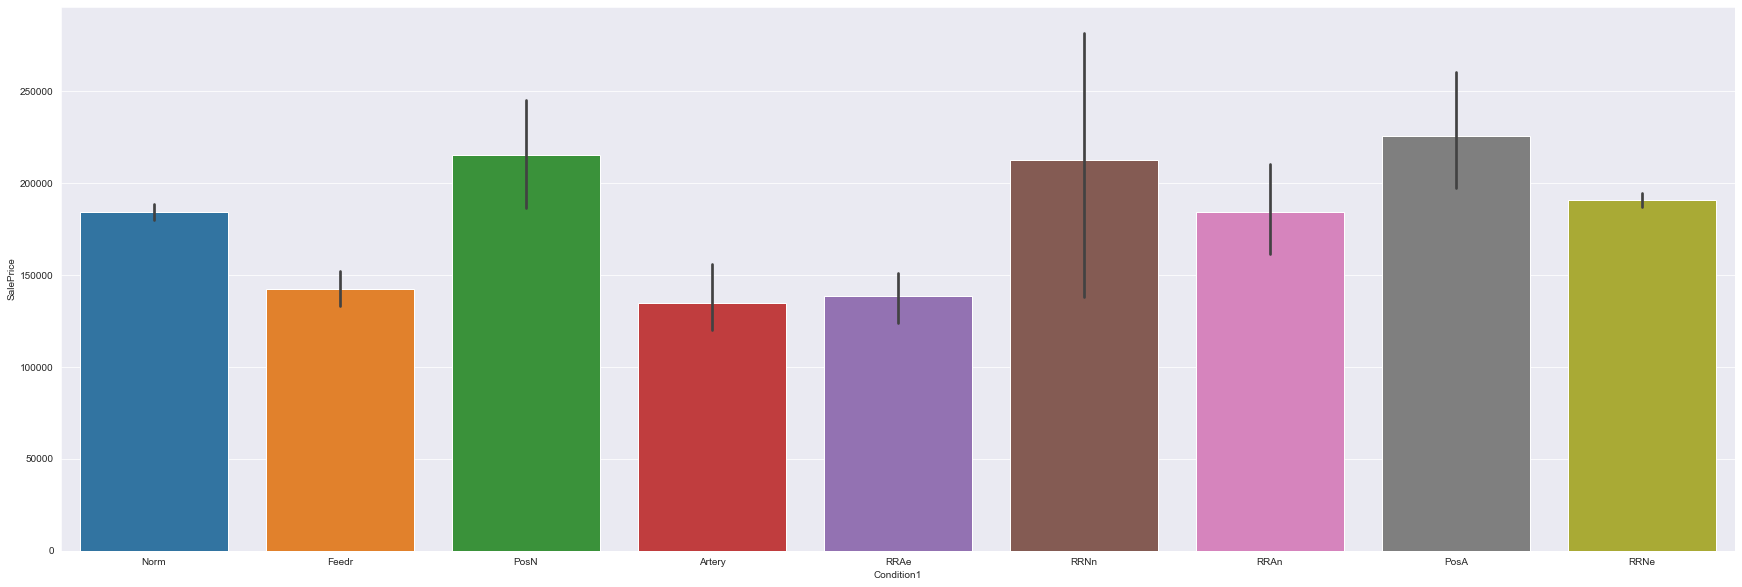

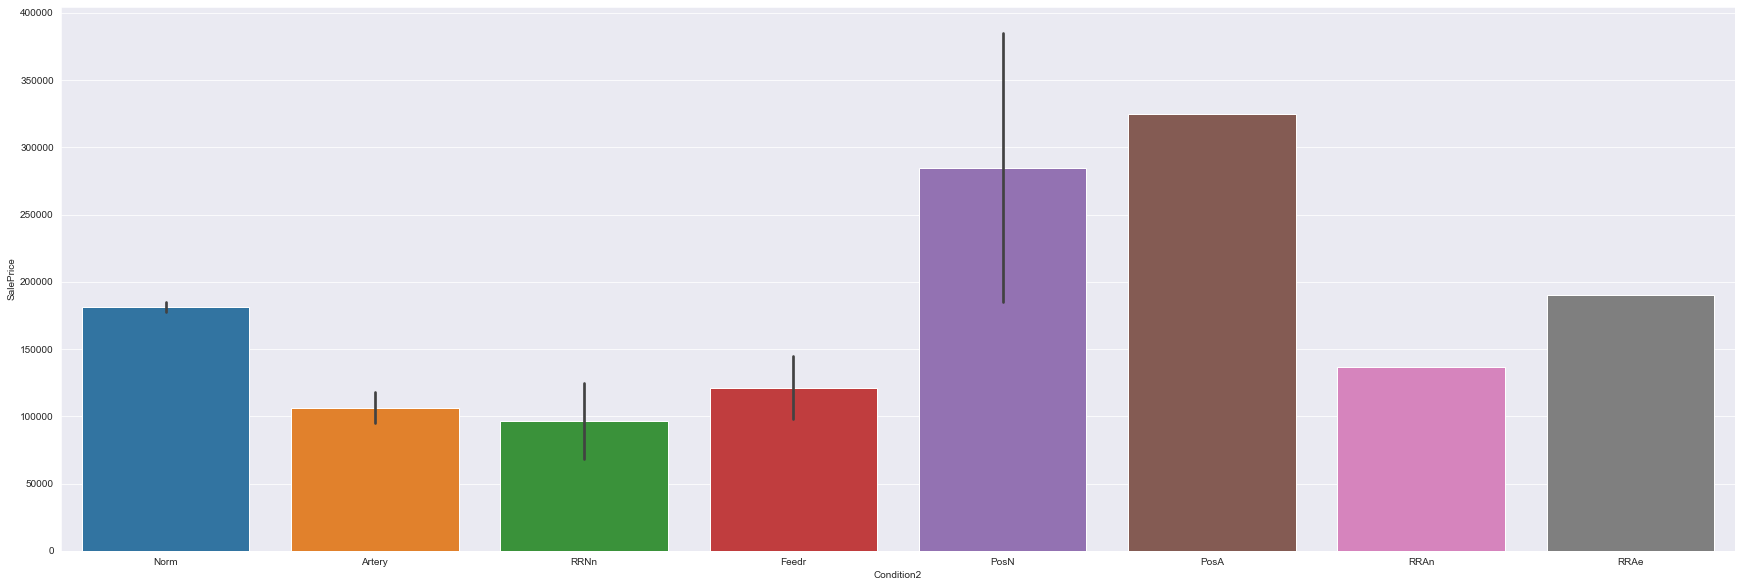

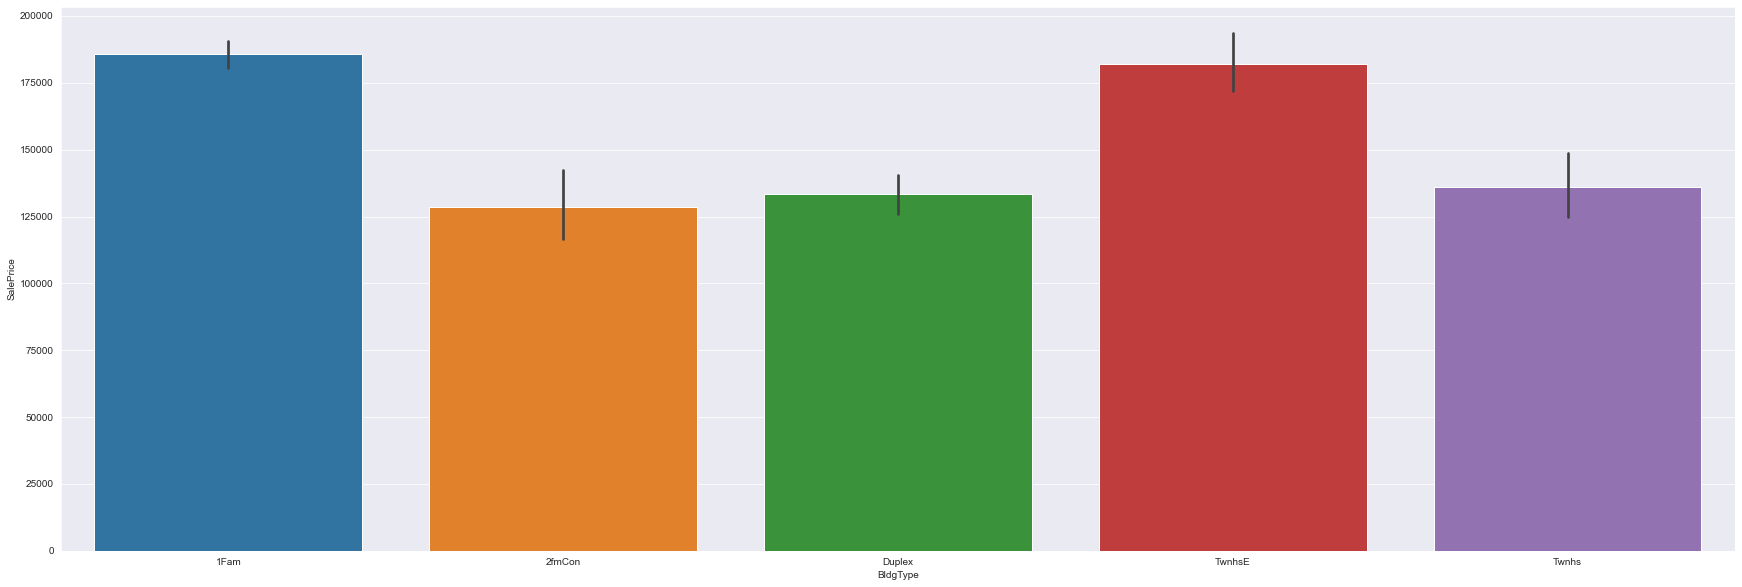

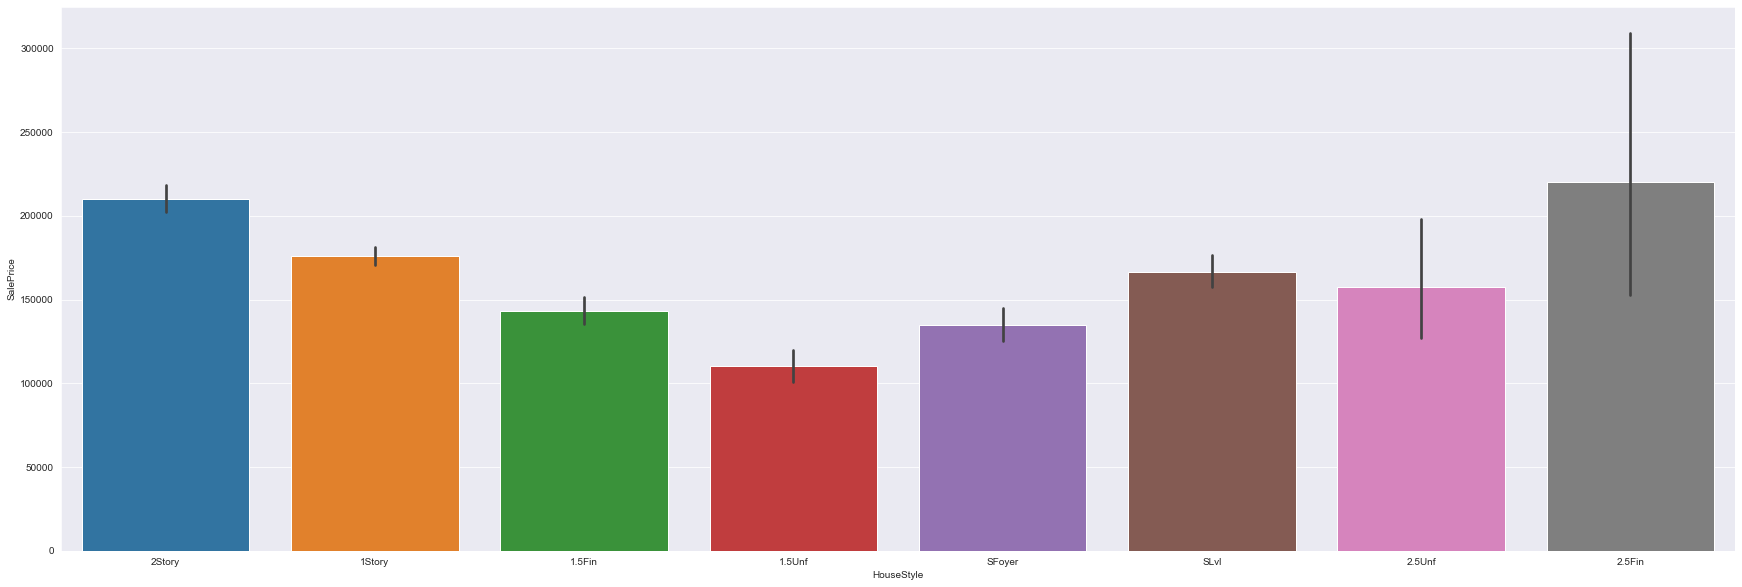

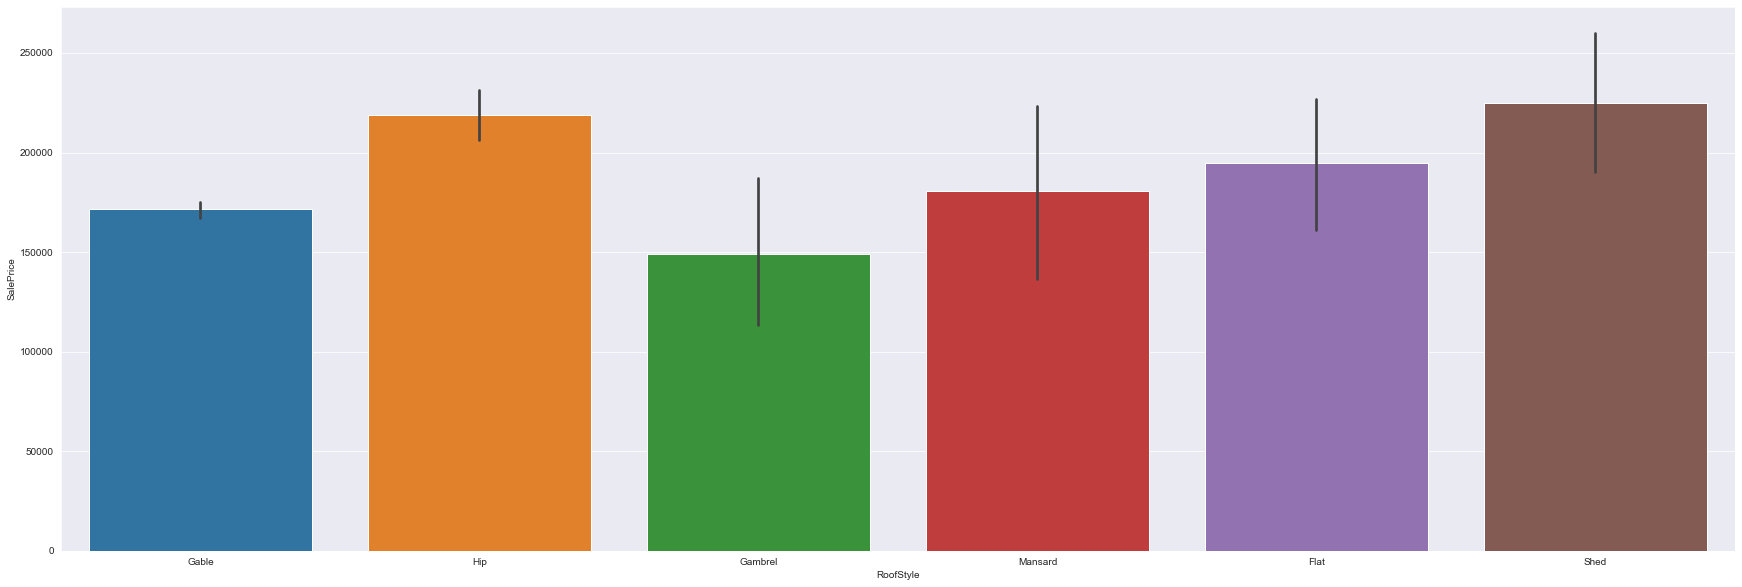

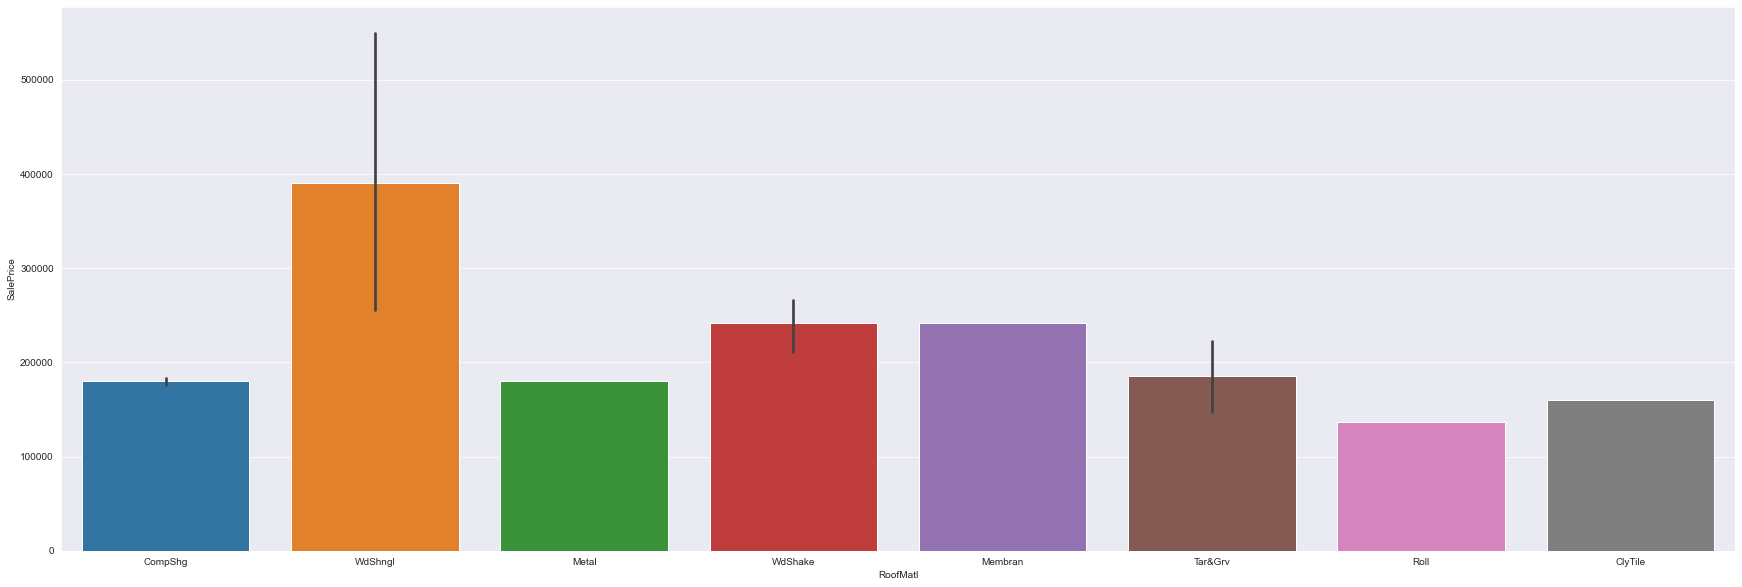

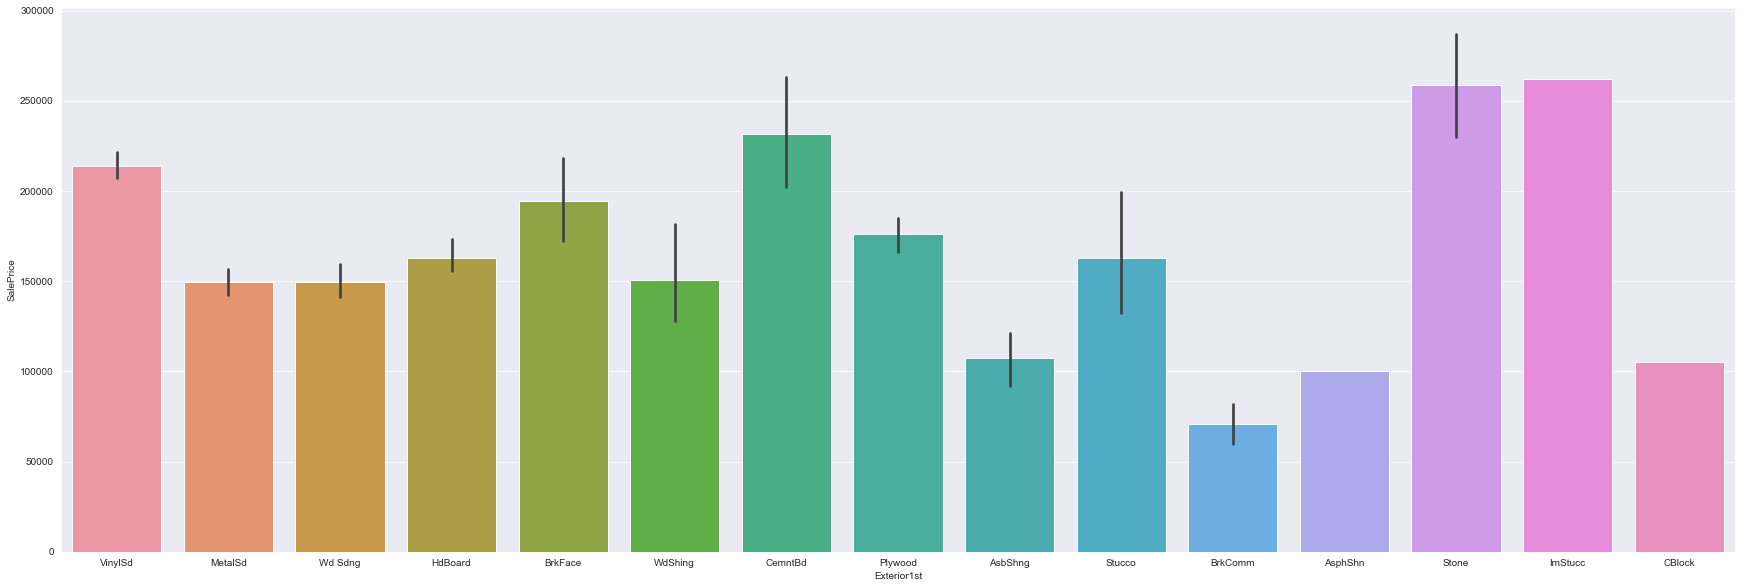

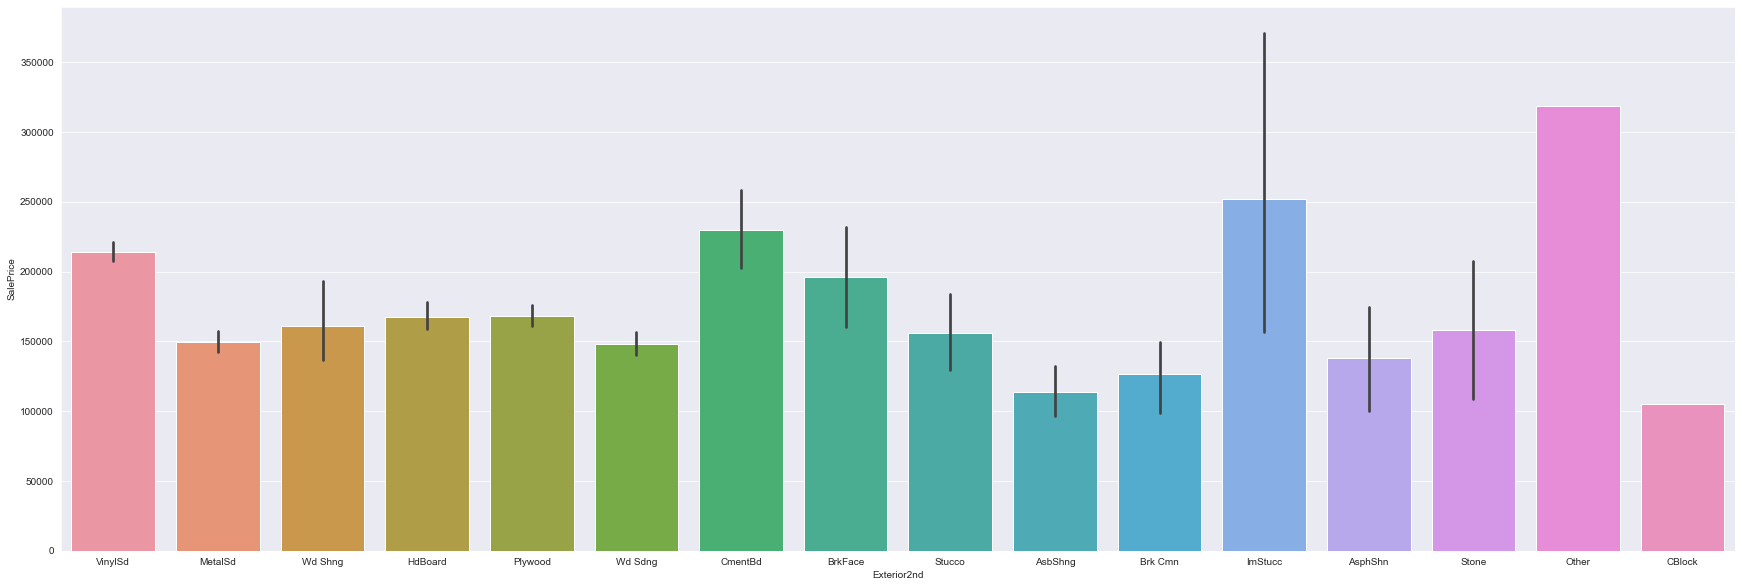

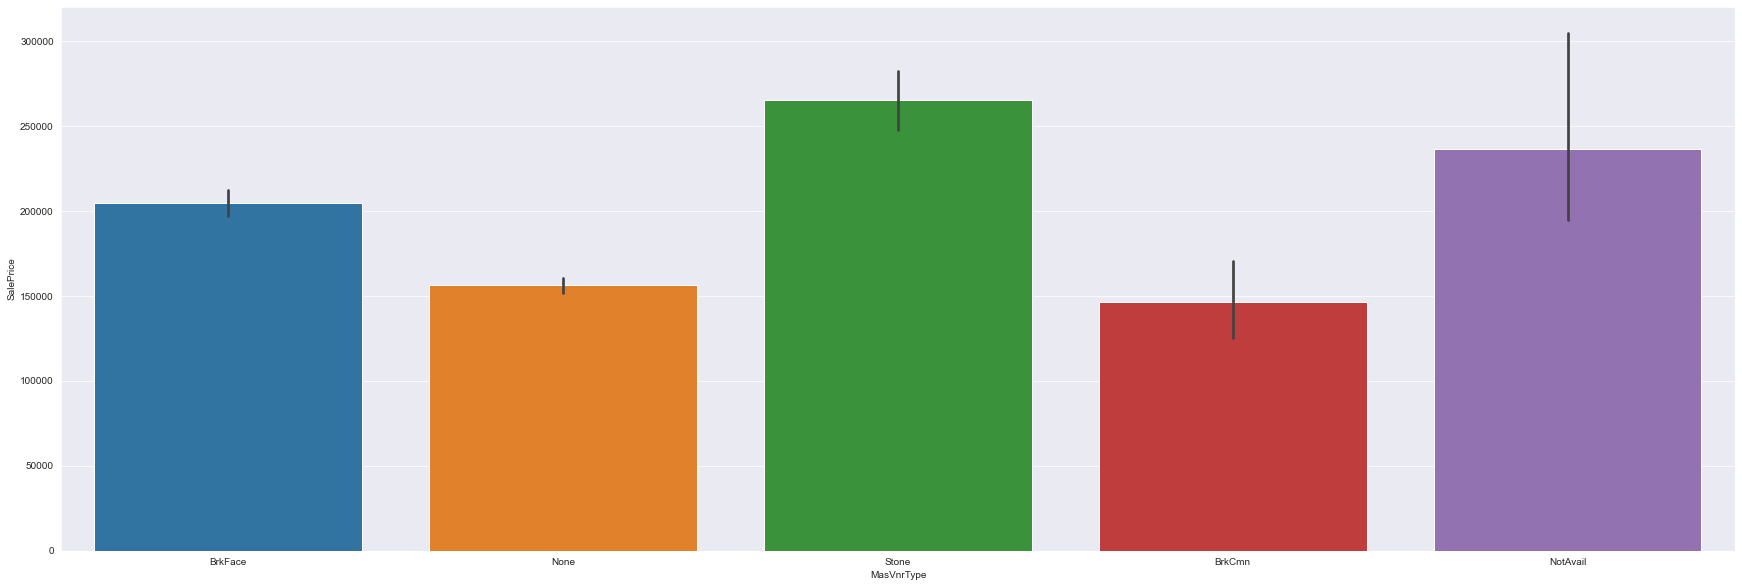

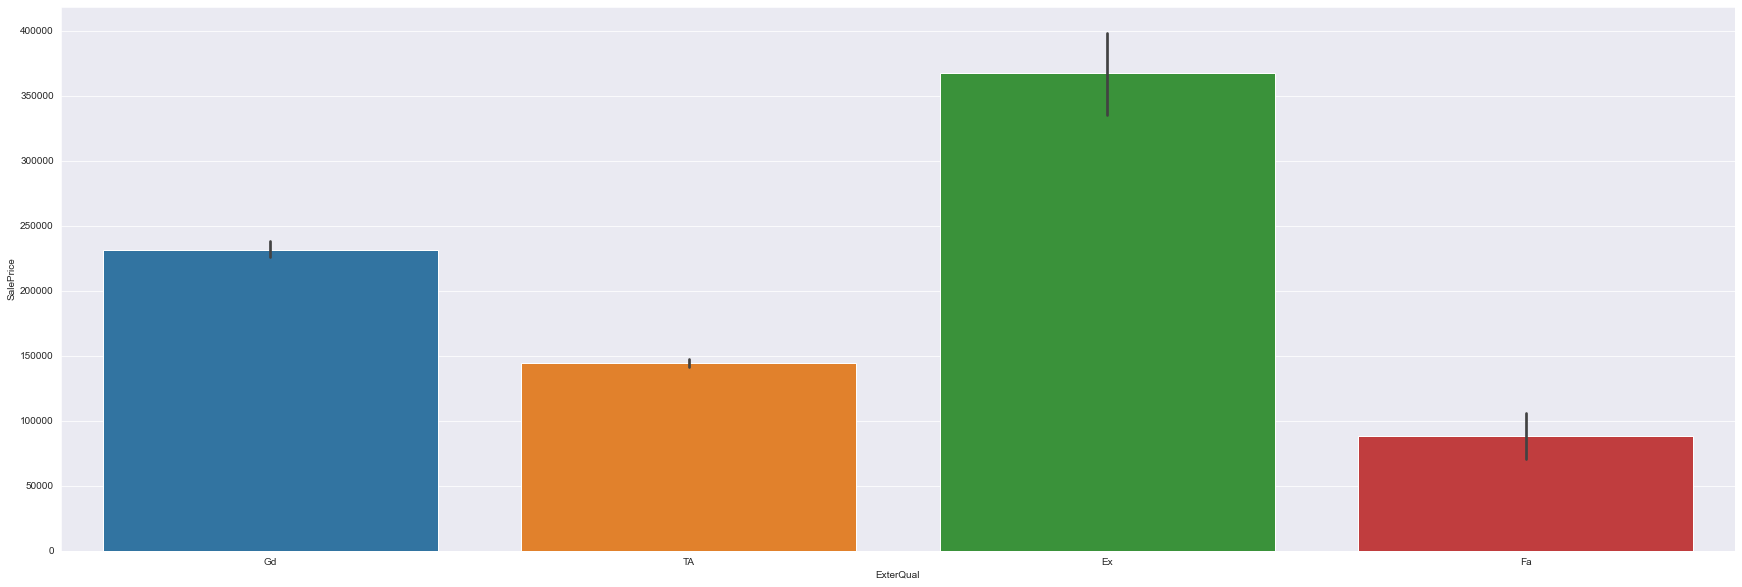

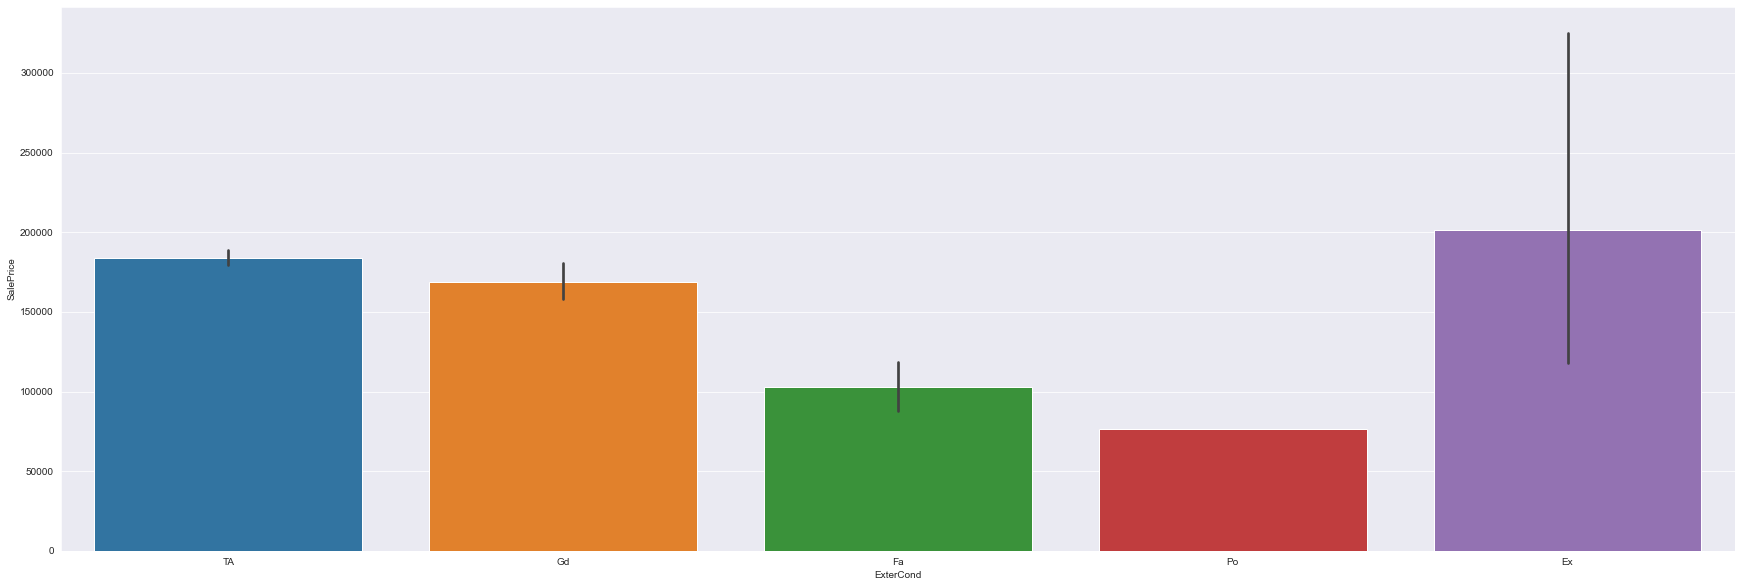

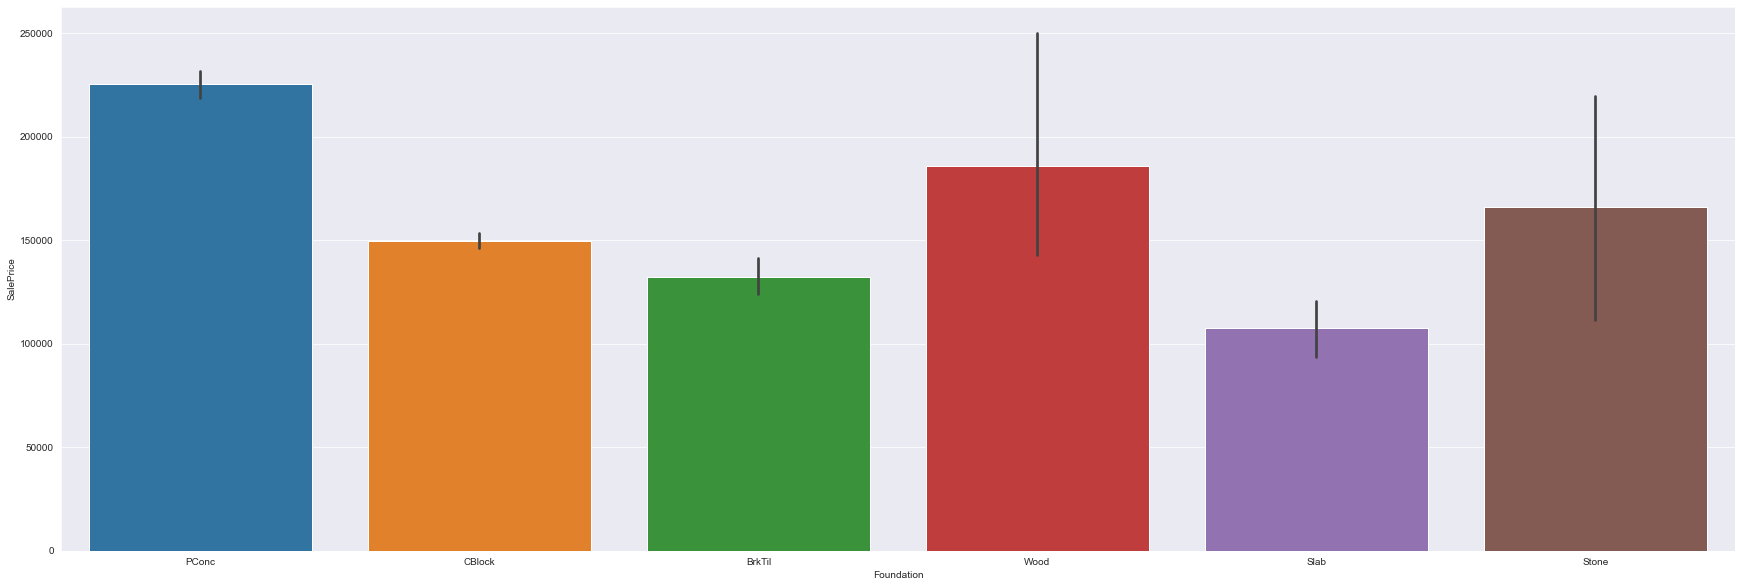

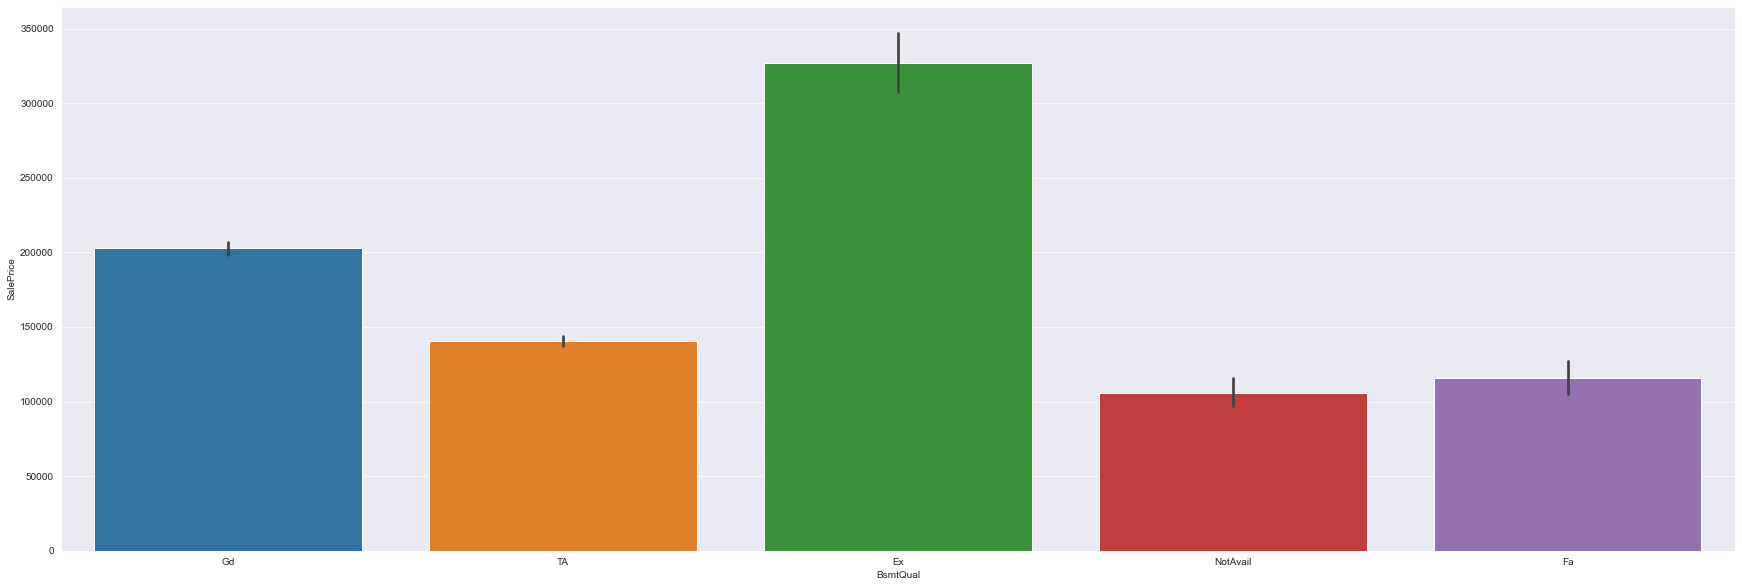

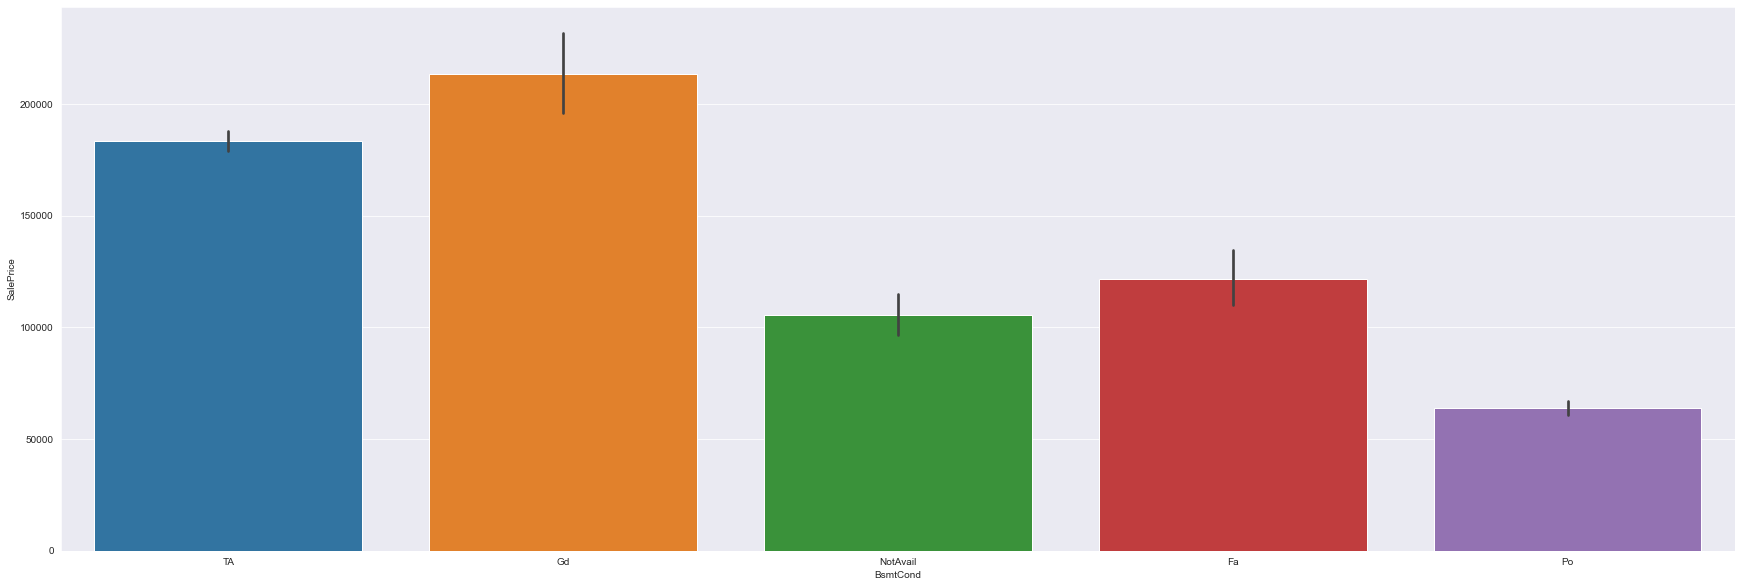

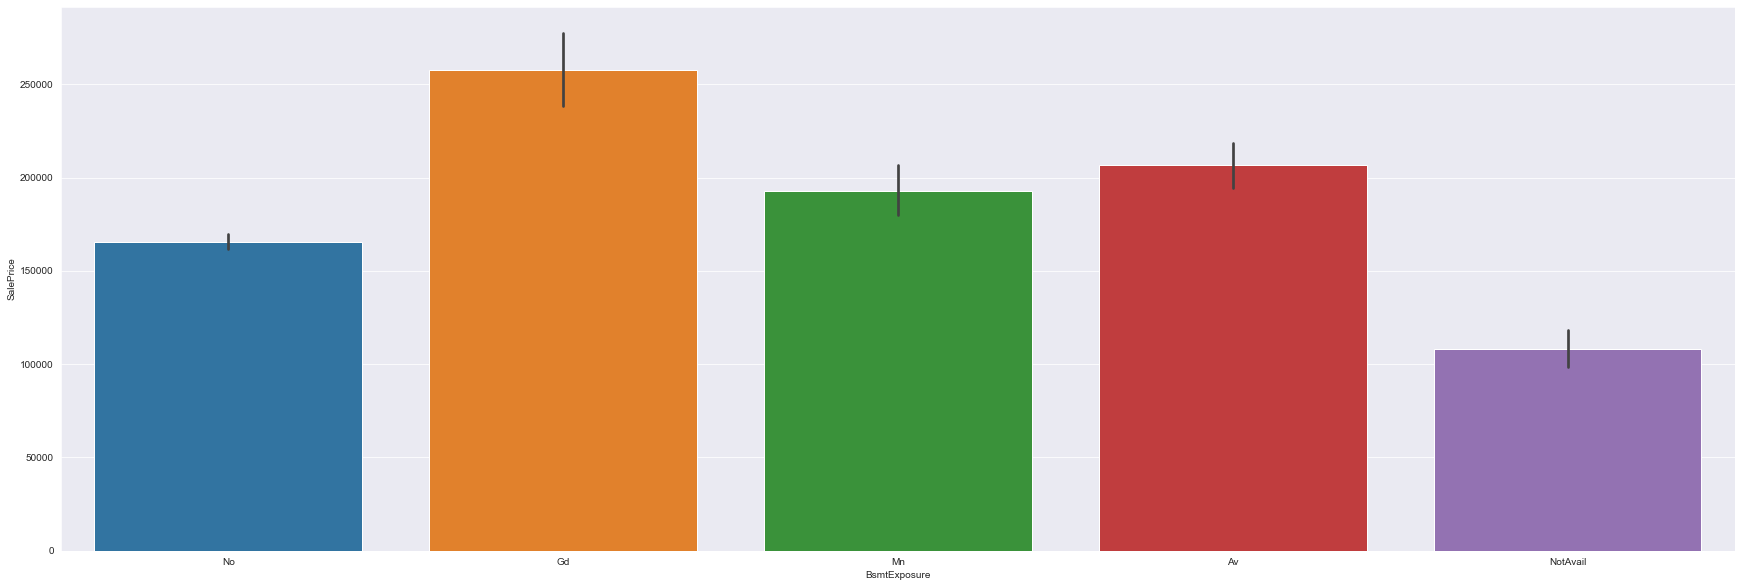

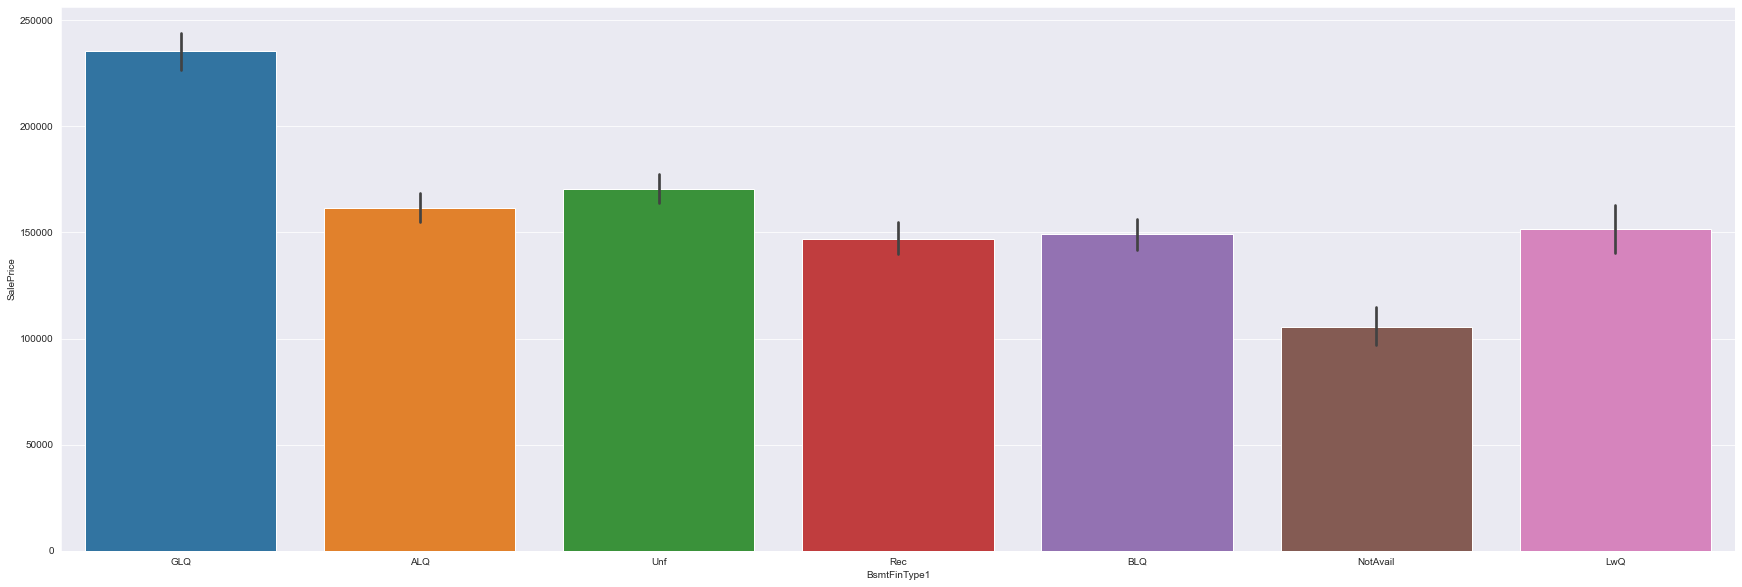

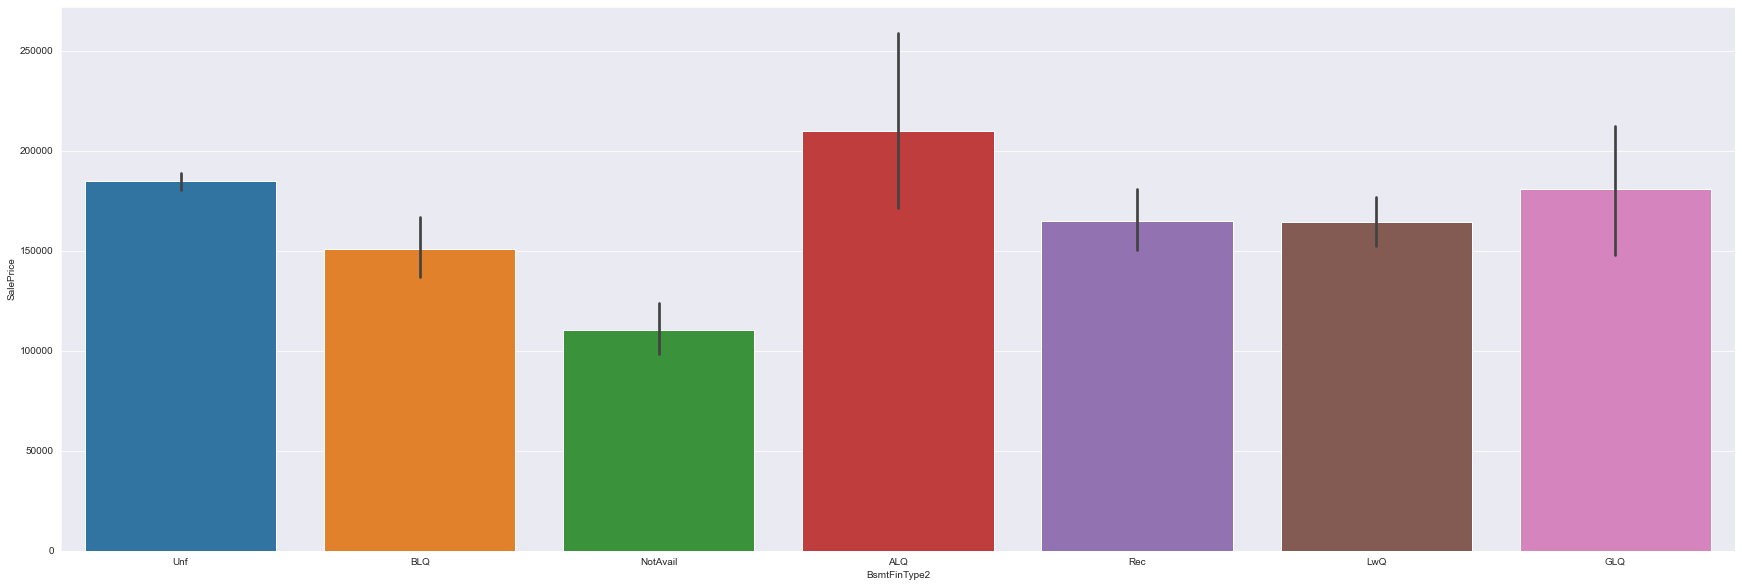

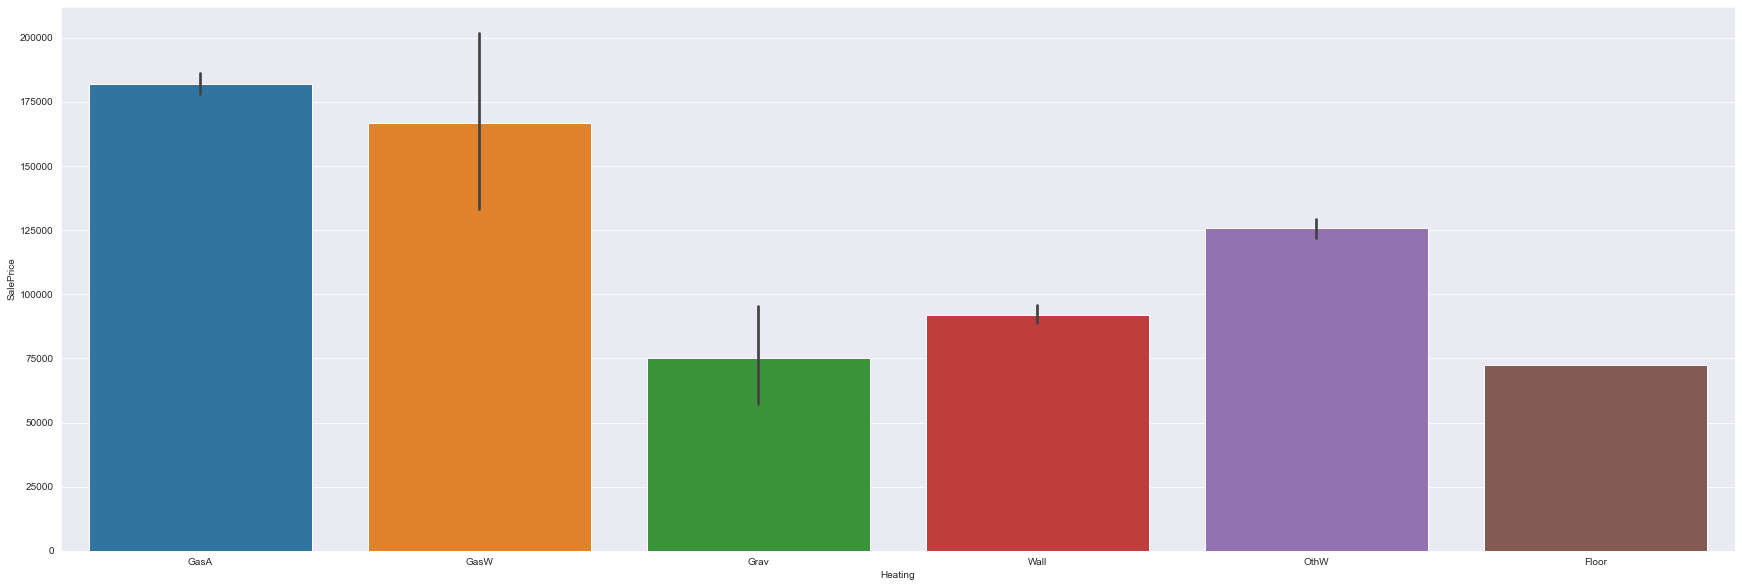

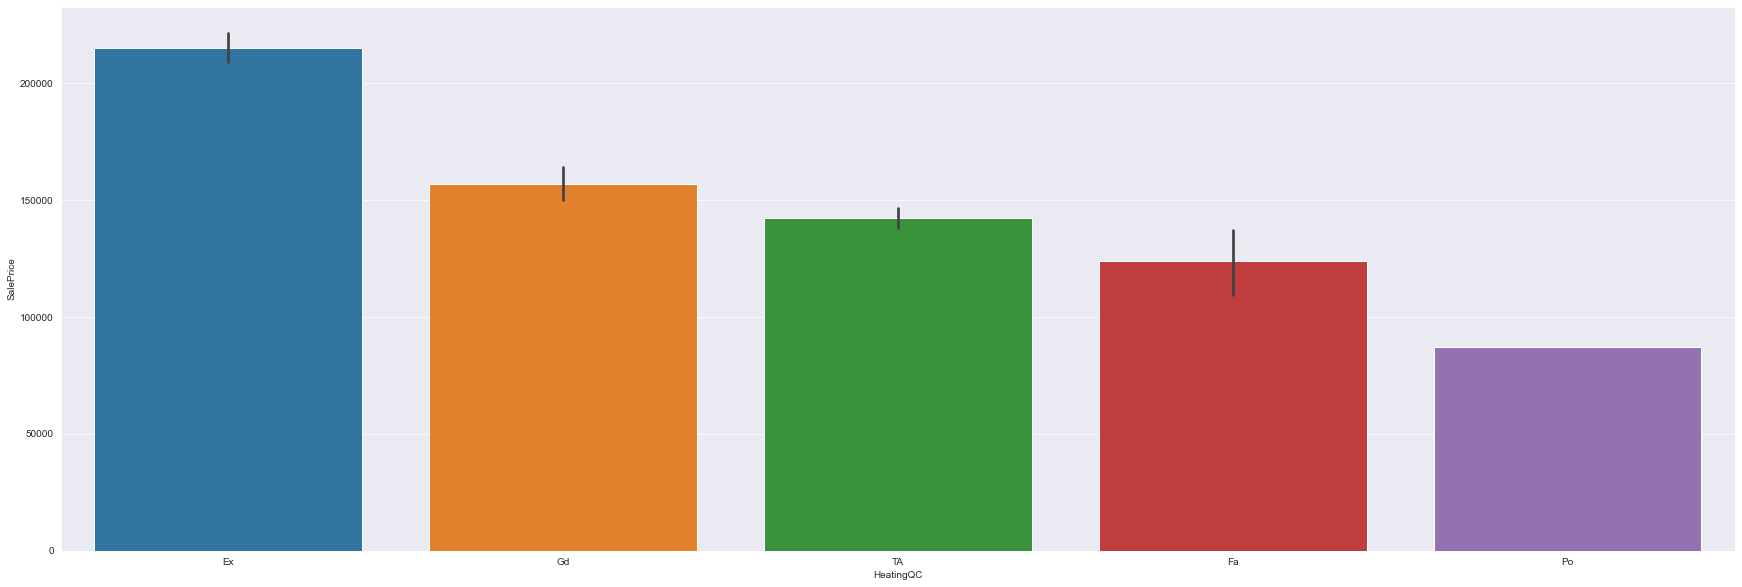

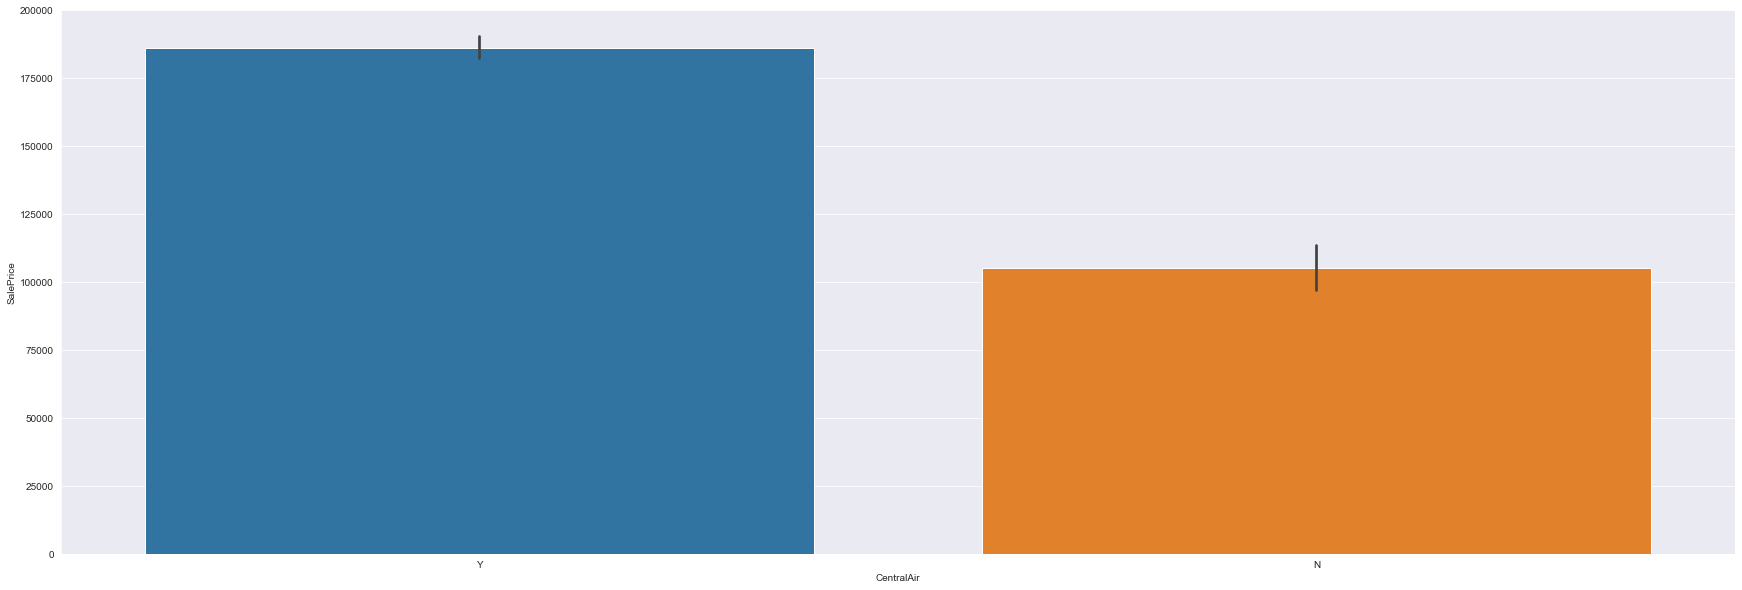

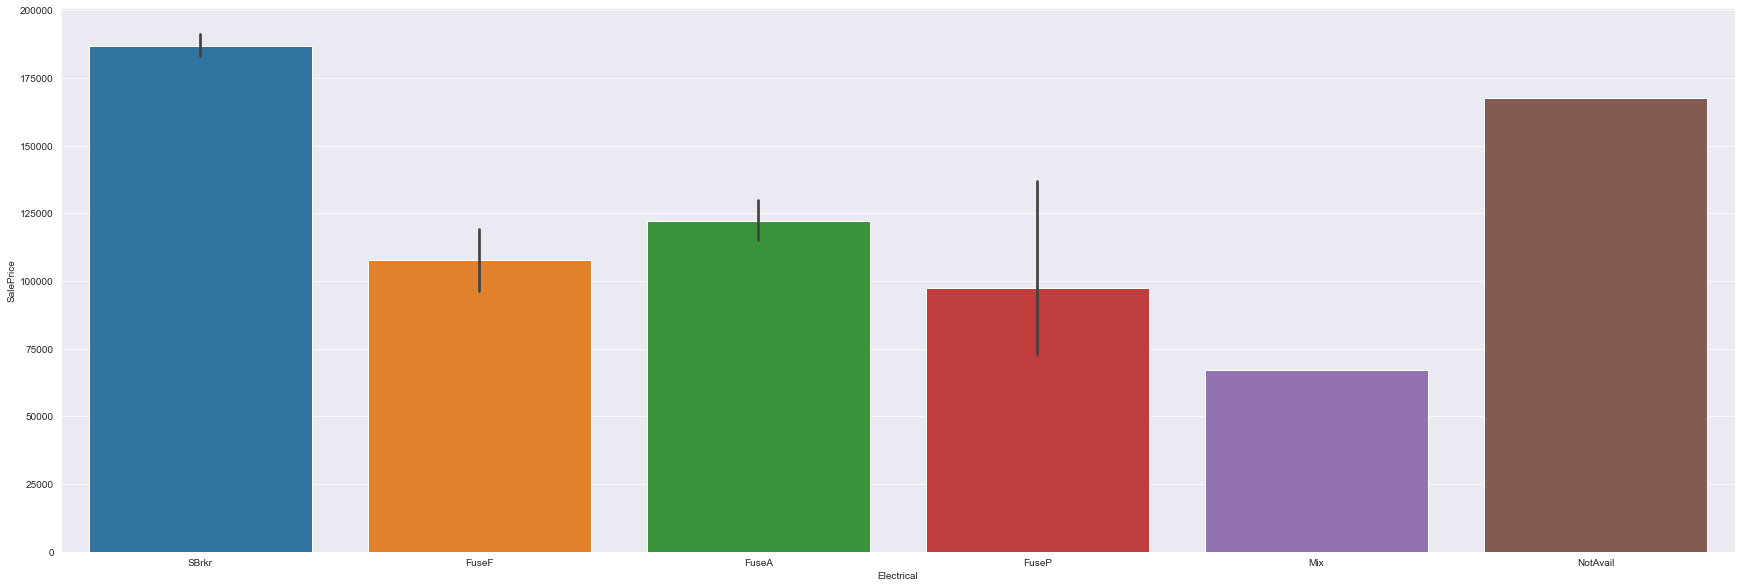

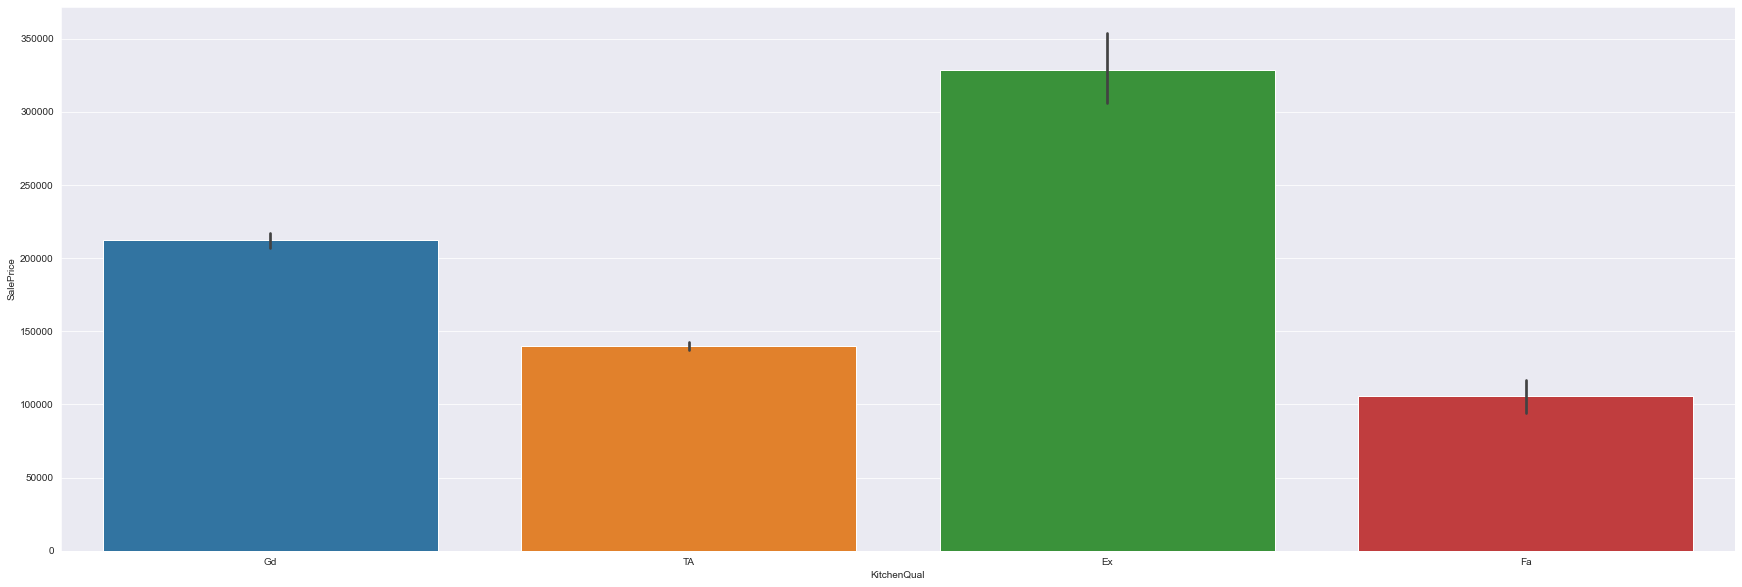

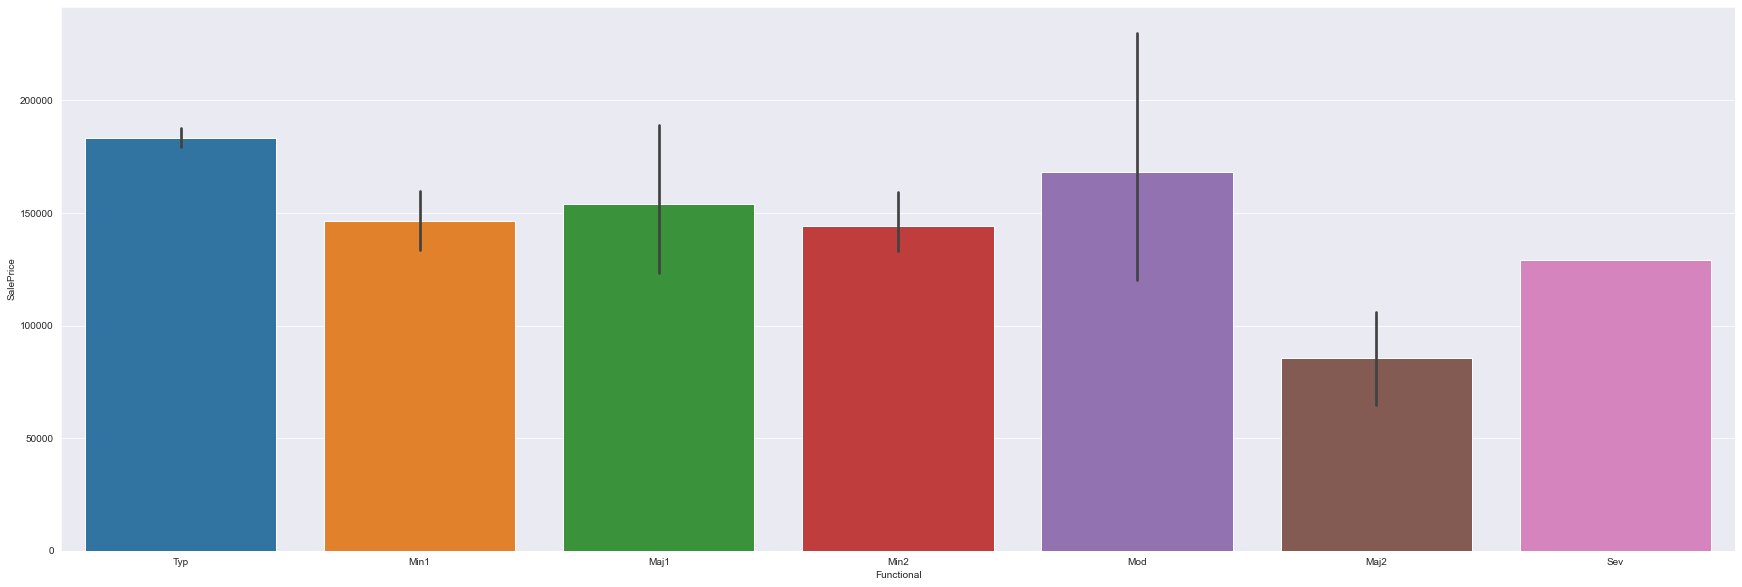

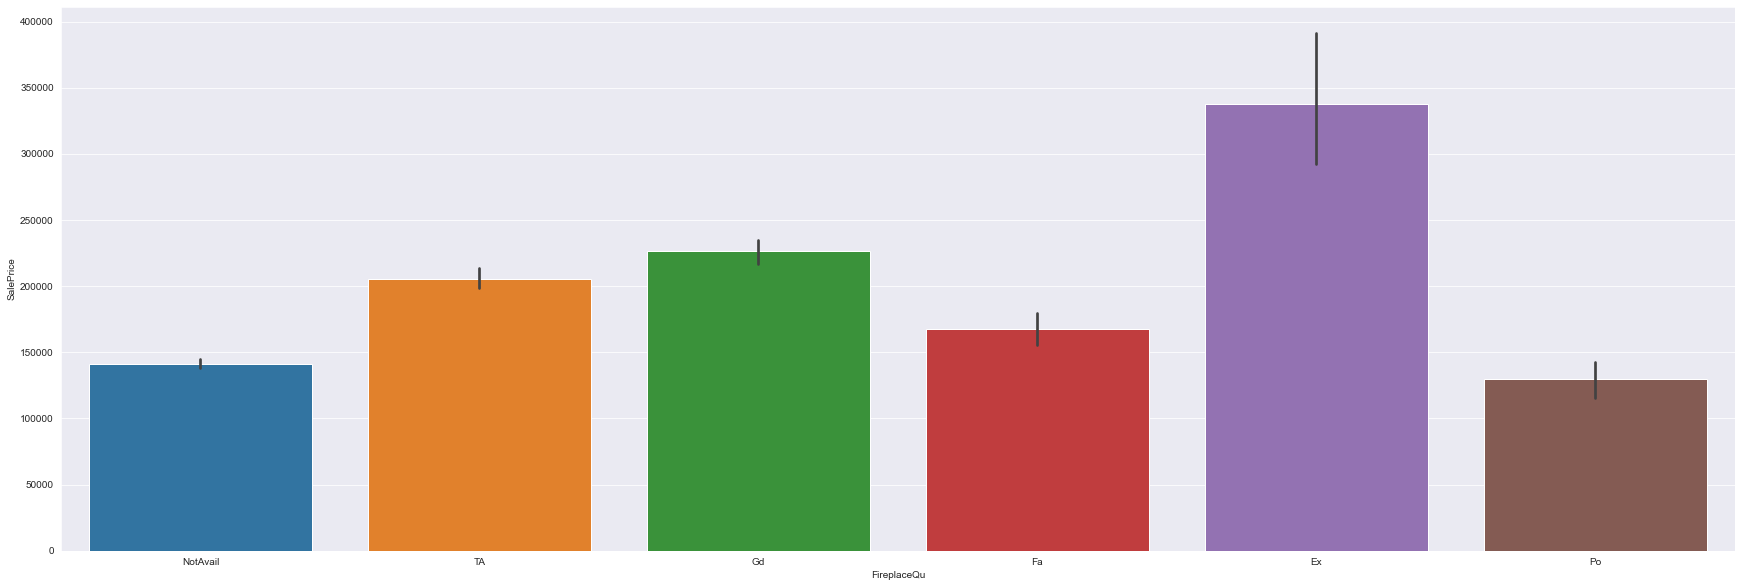

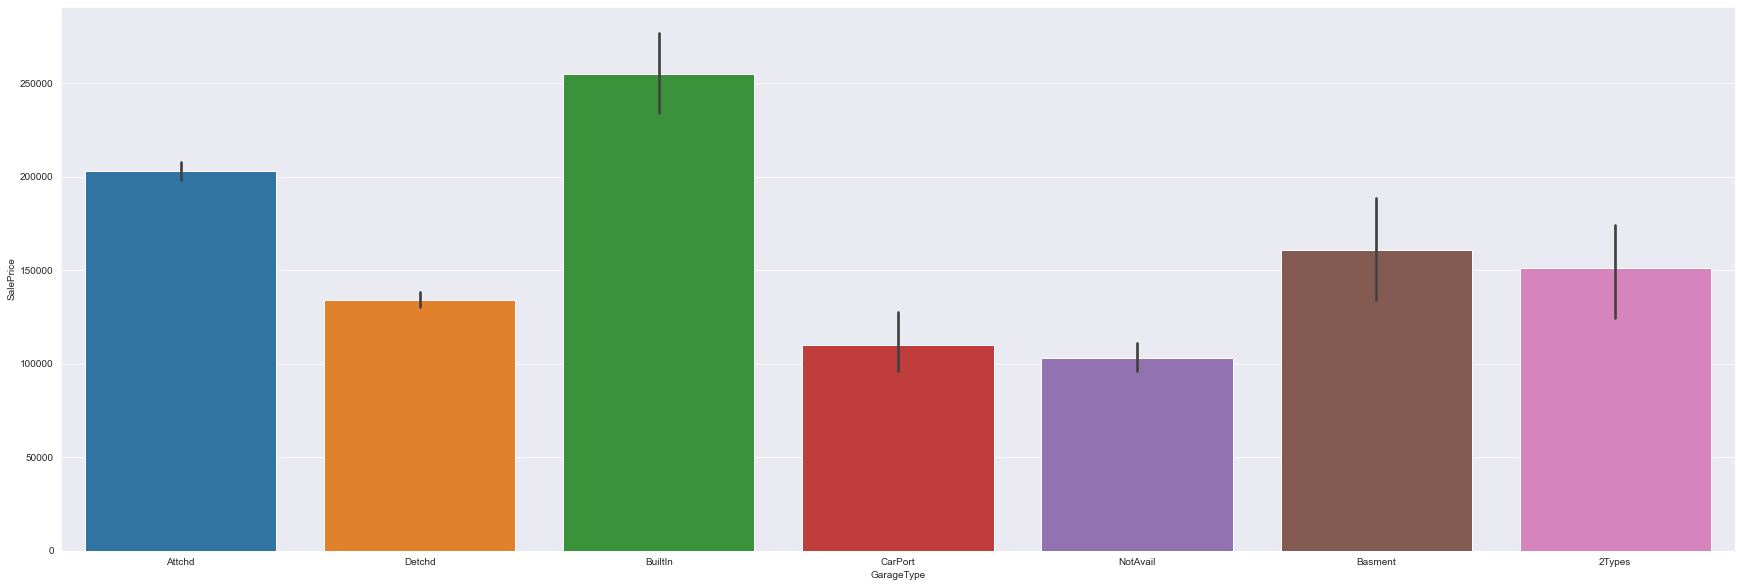

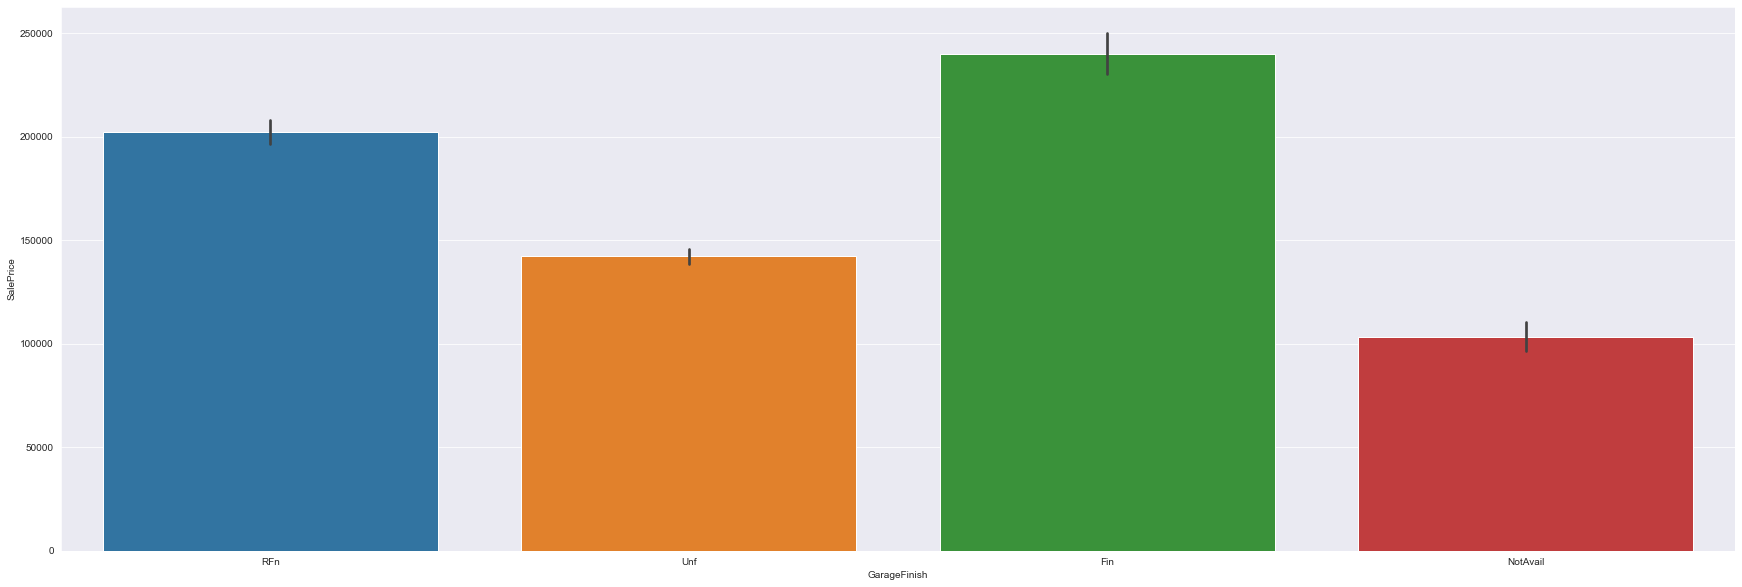

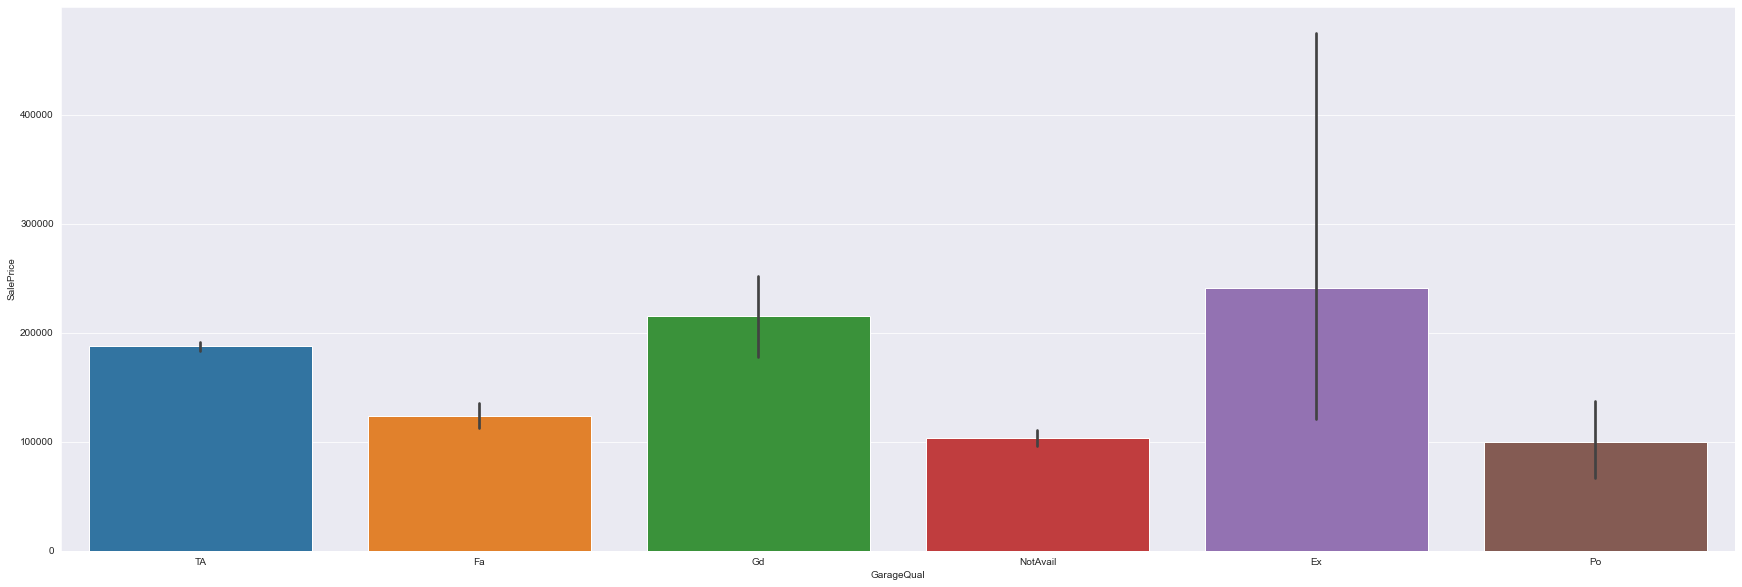

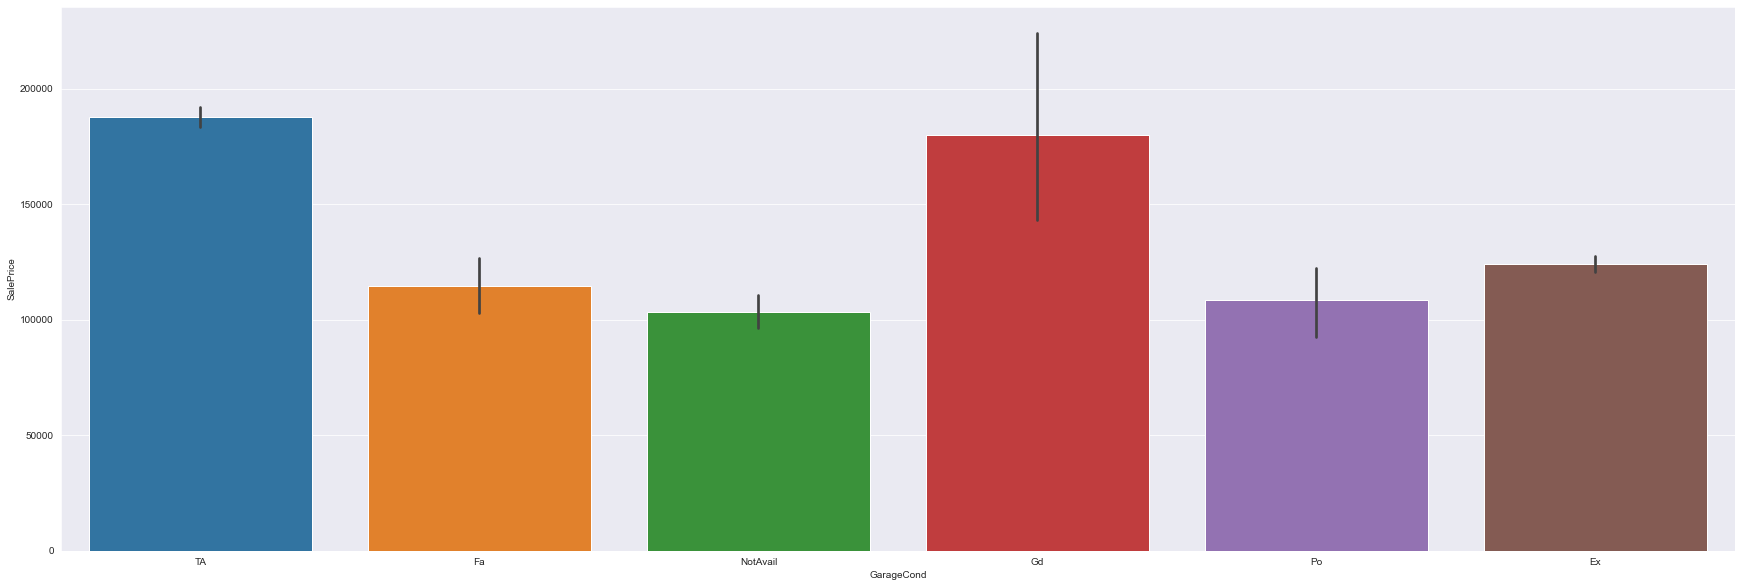

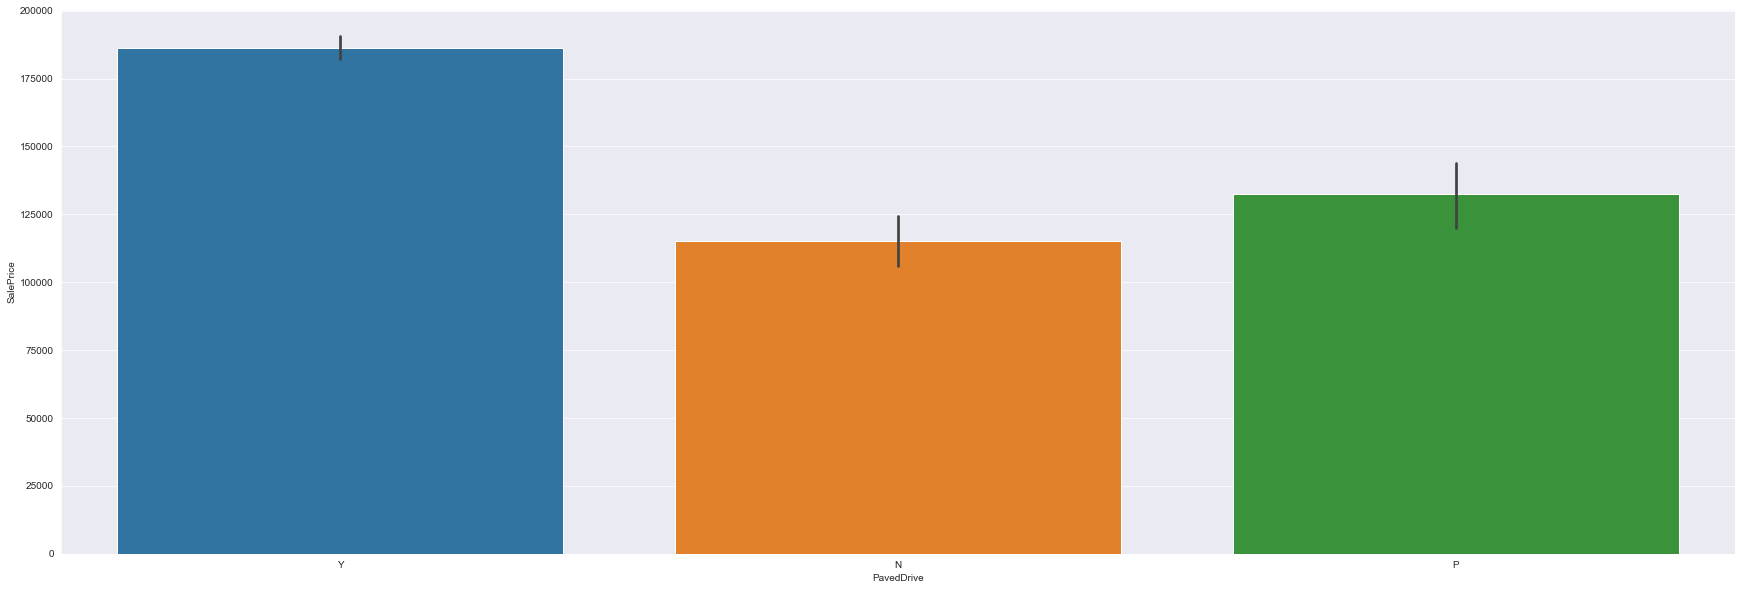

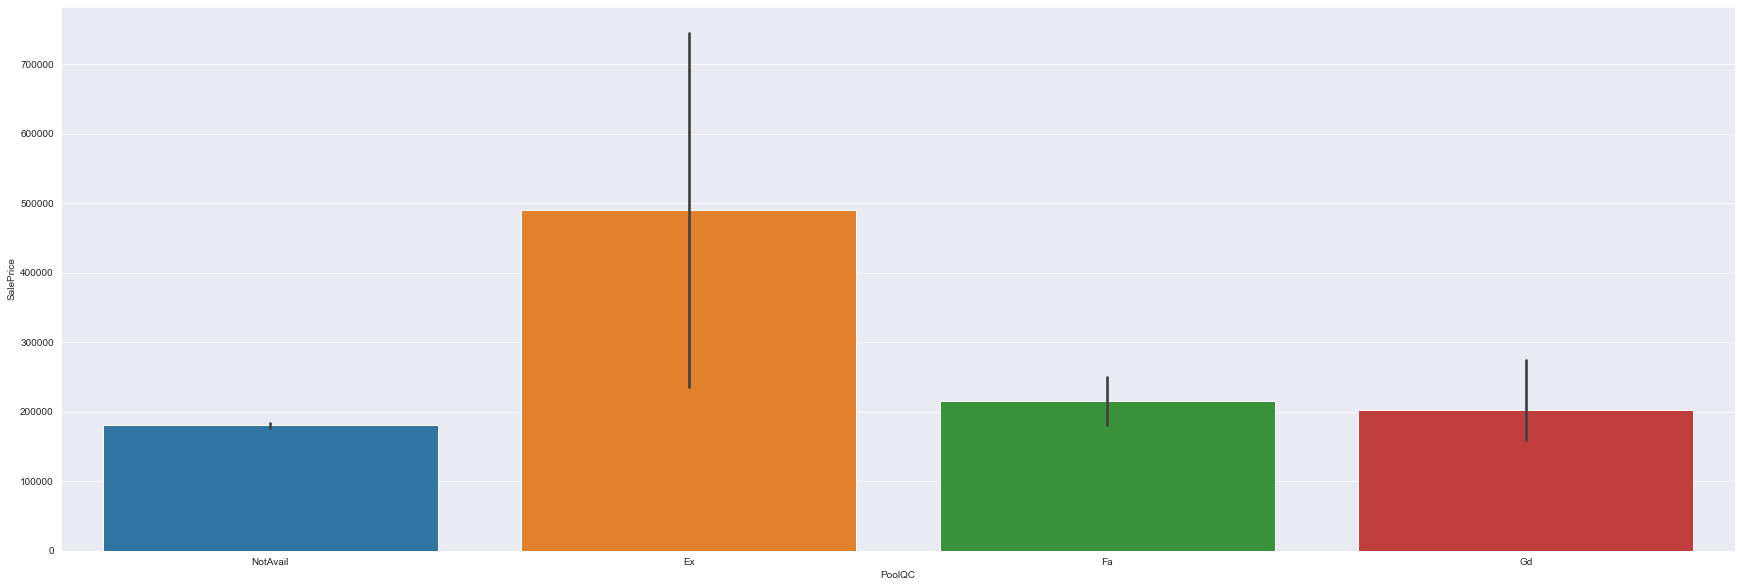

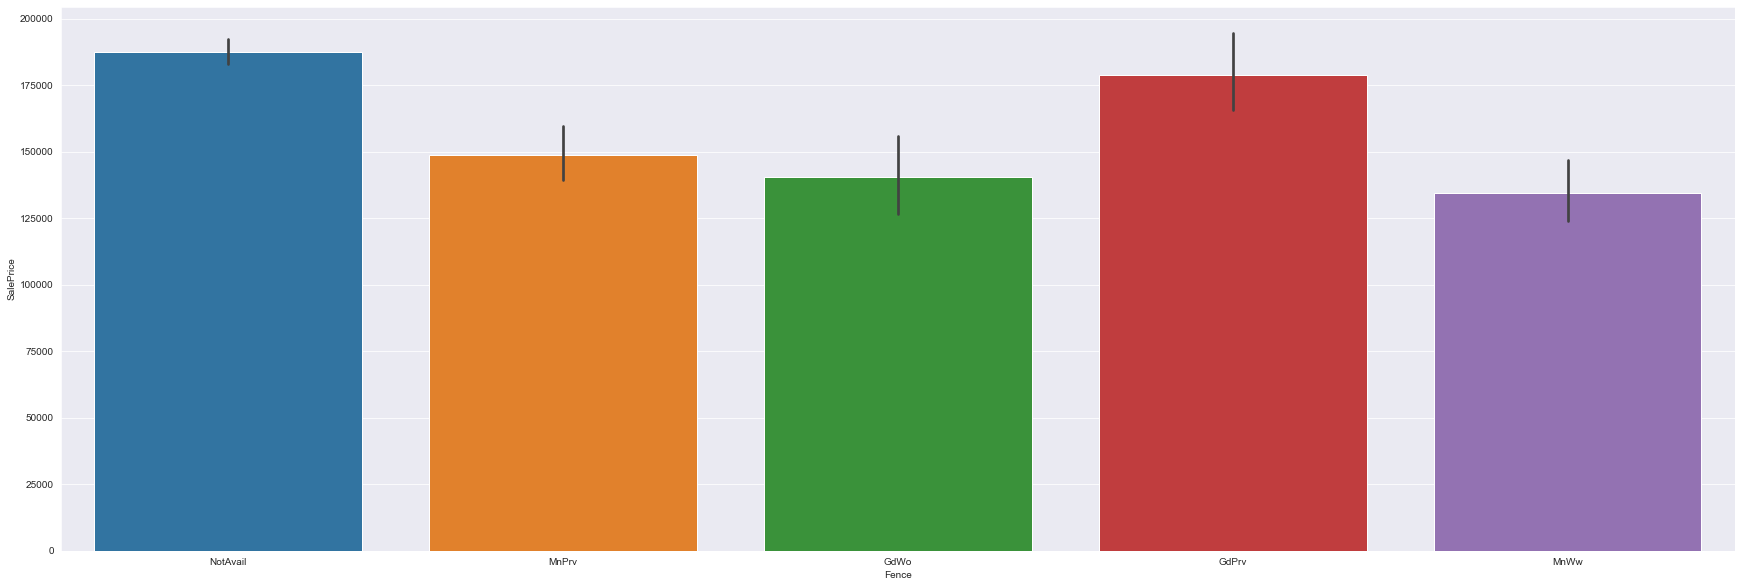

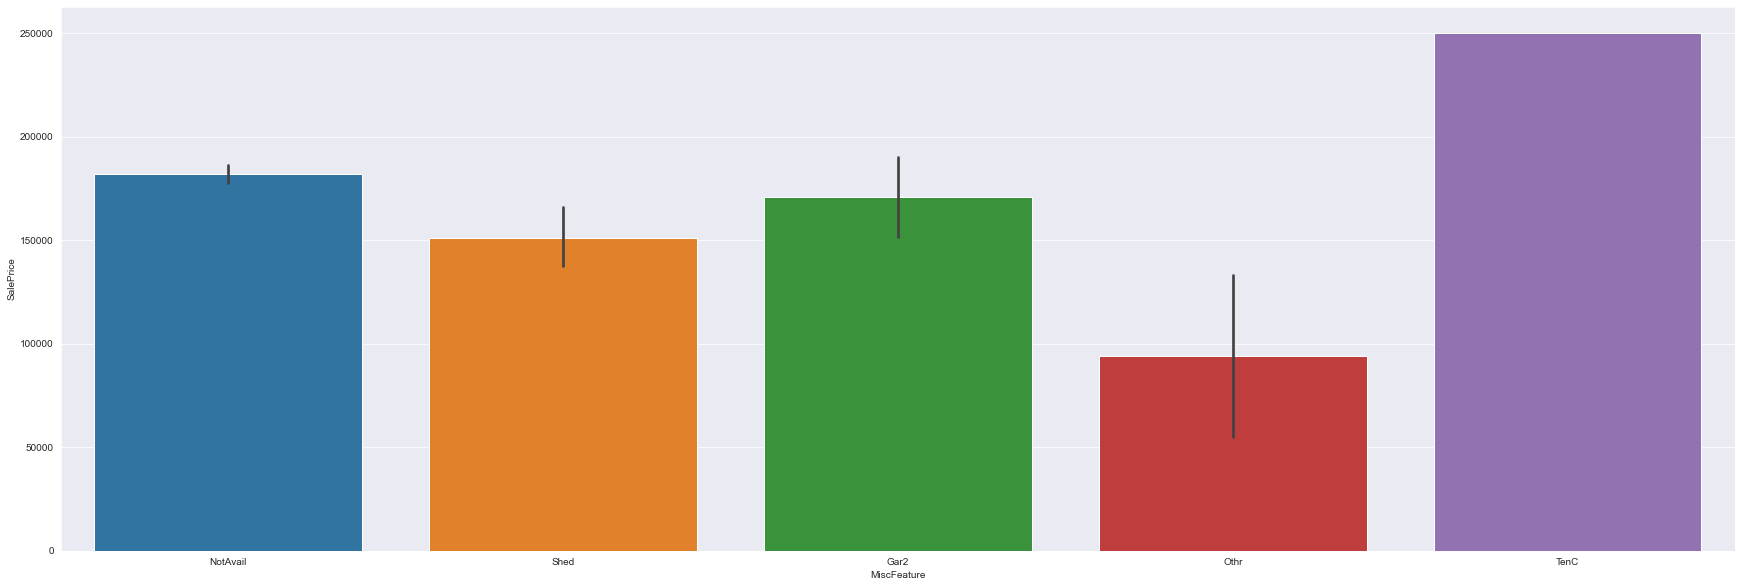

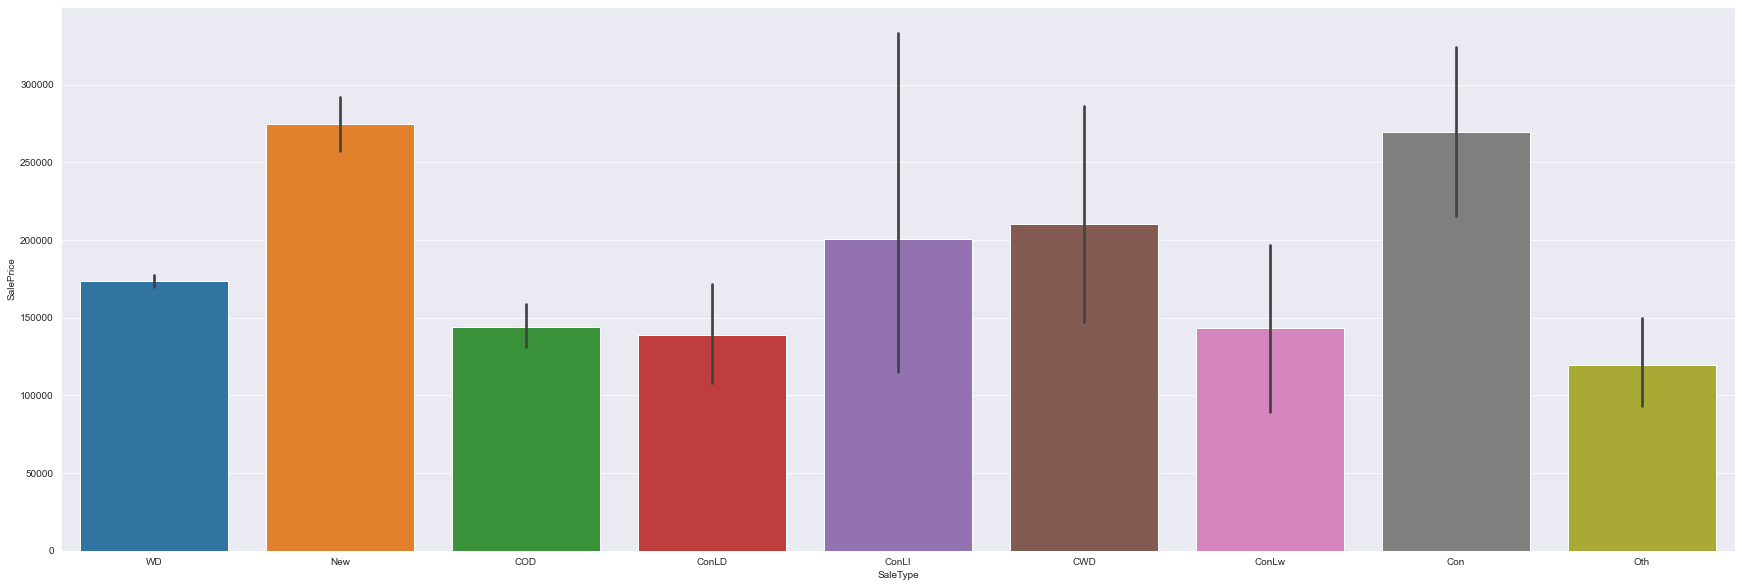

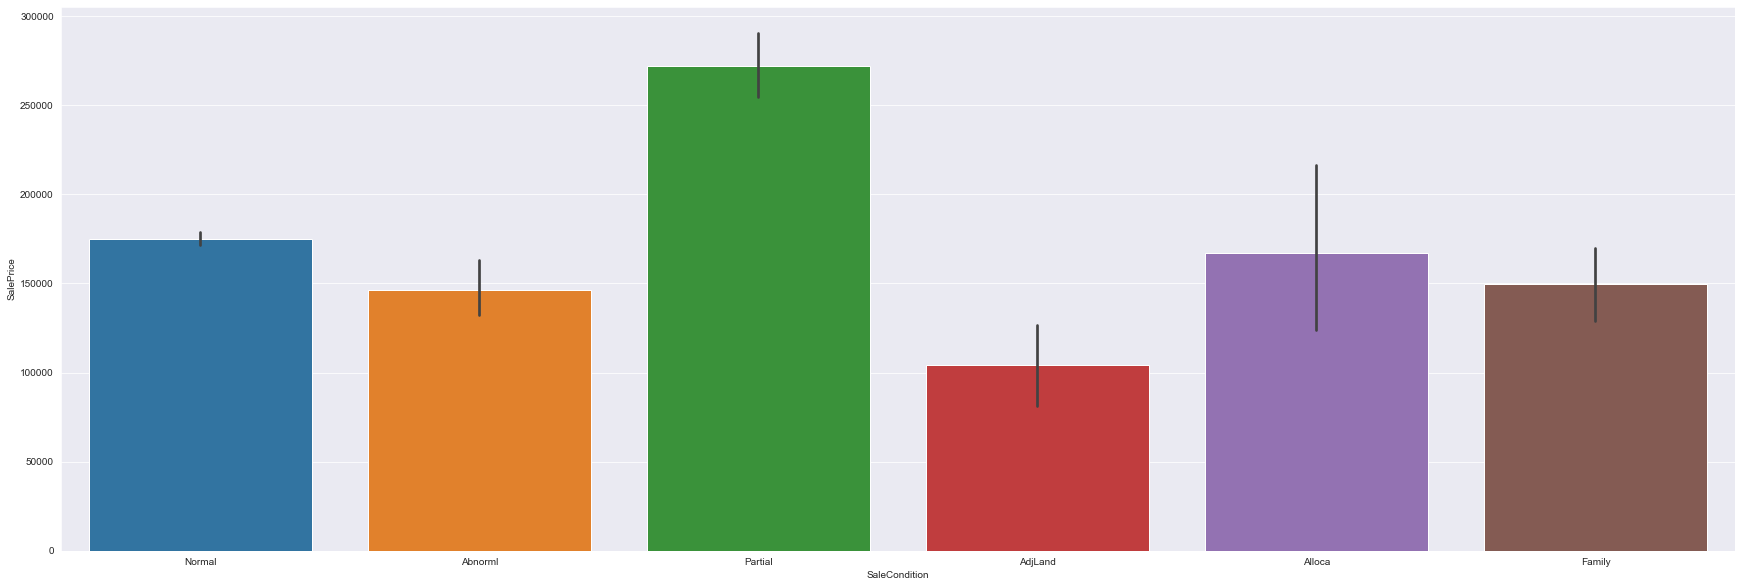

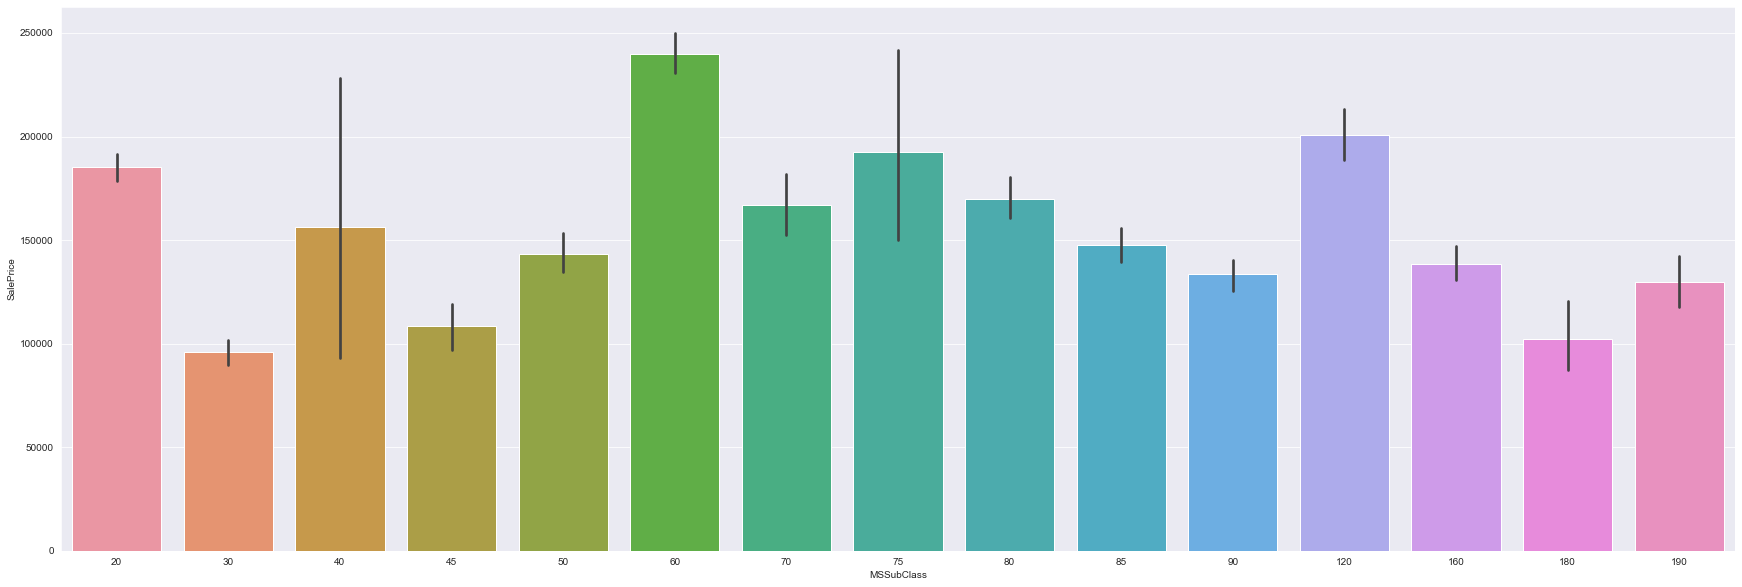

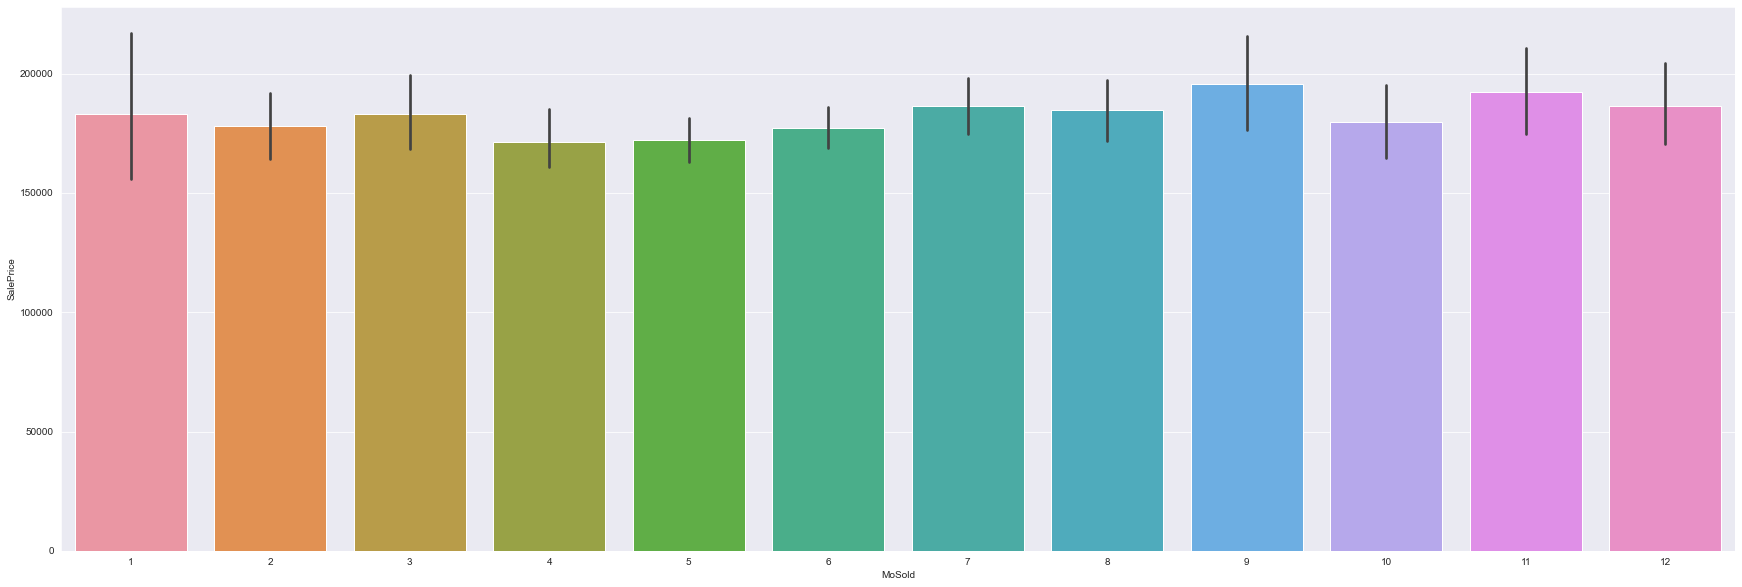

In [90]:
#  Bar Plots for Categorical Features

for col in categorical_feat:
    plt.figure(figsize=(30, 10))
    sns.barplot(x=clean_train[col], y=clean_train['SalePrice'])
    plt.show()

In [91]:
# See which variables correlate the most with SalePrice
pd.set_option('display.max_rows', None)
print(clean_train[clean_train.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False))
pd.set_option('display.max_rows', 10)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.330224
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [92]:
# Drop variables with less than a 0.02 correlation with SalePrice
least_corr_vars = ['BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath']
clean_train = clean_train.drop(columns = least_corr_vars)
clean_test = clean_test.drop(columns = least_corr_vars)

In [93]:
# Encode our categorical variables

In [94]:
clean_train['was_remodeled'] =  clean_train['YearRemodAdd'] - clean_train['YearBuilt'] 
clean_train['was_remodeled'] = [1 if i > 0 else 0 for i in clean_train['was_remodeled']];
clean_test['was_remodeled'] =  clean_test['YearRemodAdd'] - clean_test['YearBuilt'] 
clean_test['was_remodeled'] = [1 if i > 0 else 0 for i in clean_test['was_remodeled']];
categorical_feat.append('was_remodeled')

In [95]:
len(categorical_feat)

46

In [96]:
ordinal_features = ['LotShape','LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
               'GarageQual', 'GarageCond' , 'Utilities', 'PoolQC']
nominal_features = ['MSSubClass', 'MSZoning','Street', 'LotConfig', 'Neighborhood',
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
               'GarageType', 'GarageFinish', 'PavedDrive','SaleType', 'SaleCondition'
               , 'LandContour', "Alley", "Fence", 'MiscFeature','was_remodeled']
len(ordinal_features)+len(nominal_features)

45

In [97]:
# Label Encode the Ordinal Features

ordinal_feat_dict = {'LotShape': ['Reg','IR1','IR2','IR3', 'NotAvail'],
            'LandSlope' : ["Gtl", "Mod", "Sev",'NotAvail' ],
            'ExterQual': [  "Ex", "Gd", "TA", "Fa", "Po", 'NotAvail' ],
            'ExterCond': [  "Ex", "Gd", "TA", "Fa", "Po", 'NotAvail' ],
            'BsmtQual': [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'BsmtCond':[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'BsmtExposure': ["Gd", "Av", "Mn", "No", "NA", 'NotAvail'],
            'BsmtFinType1':[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NotAvail'],
            'BsmtFinType2':[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NotAvail'],
            'HeatingQC': [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'KitchenQual': [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'FireplaceQu':[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'GarageQual':[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'GarageCond': [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            'Utilities':  [ "AllPub", "NoSewr", "NoSeWa","ELO", "NotAvail"],
            'PoolQC':[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ]
           }

In [98]:

def encode_features(nominal_feats, ordinal_feats, df, test_df=pd.DataFrame()):
    
    # Label encode all ordinal features
    le = LabelEncoder()
    
    for col in ordinal_feats:
        le.fit(ordinal_feat_dict[col])
        df[col] = le.transform(df[col])
        if len(test_df) != 0:
            test_df[col] = le.transform(test_df[col])
    
    # Dummy encode all nominal features
    for col in nominal_feats:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df.drop([col], axis=1, inplace=True)
        
        if len(test_df) != 0:
            test_df = pd.concat([test_df, dummies], axis=1)
            test_df.drop([col], axis=1, inplace=True)
     
    if len(test_df) != 0:
        return df, test_df
    else:
        return df


clean_train, clean_test = encode_features(nominal_features, ordinal_features, clean_train, clean_test)

In [99]:
#display(clean_train)
#display(clean_test)

In [100]:
# Address Outliers after looking at scatterplots

In [101]:
clean_train = clean_train[clean_train['BsmtFinSF1']<2000]
clean_train = clean_train[clean_train['LotFrontage']<200]
clean_train = clean_train[clean_train['LotArea']<100000]
clean_train = clean_train[clean_train['MasVnrArea']<1200]
clean_train = clean_train[clean_train['BsmtUnfSF']<2000]
clean_train = clean_train[clean_train['TotalBsmtSF']<3000]
#clean_train = clean_train[clean_train['BsmtFinSF2']<1200]
clean_train = clean_train[clean_train['1stFlrSF']<3000]
clean_train = clean_train[clean_train['2ndFlrSF']<1500]
clean_train = clean_train[clean_train['BsmtFullBath']<2.5]
#clean_train = clean_train[clean_train['BsmtHalfBath']<1.75]
clean_train = clean_train[clean_train['LowQualFinSF']<550]
clean_train = clean_train[clean_train['GrLivArea']<4000]
clean_train = clean_train[(clean_train['YearBuilt']>1885)]

In [102]:
clean_train

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Fence_MnPrv,Fence_MnWw,Fence_NotAvail,MiscFeature_Gar2,MiscFeature_NotAvail,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,was_remodeled_0,was_remodeled_1
0,65.0,8450,4,0,0,7,5,2003,2003,196.0,...,0,0,1,0,1,0,0,0,1,0
1,80.0,9600,4,0,0,6,8,1976,1976,0.0,...,0,0,1,0,1,0,0,0,1,0
2,68.0,11250,0,0,0,7,5,2001,2002,162.0,...,0,0,1,0,1,0,0,0,0,1
3,60.0,9550,0,0,0,7,5,1915,1970,0.0,...,0,0,1,0,1,0,0,0,0,1
4,84.0,14260,0,0,0,8,5,2000,2000,350.0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,0,0,6,5,1999,2000,0.0,...,0,0,1,0,1,0,0,0,0,1
1456,85.0,13175,4,0,0,6,6,1978,1988,119.0,...,1,0,0,0,1,0,0,0,0,1
1457,66.0,9042,4,0,0,7,9,1941,2006,0.0,...,0,0,0,0,0,0,1,0,0,1
1458,68.0,9717,4,0,0,5,6,1950,1996,0.0,...,0,0,1,0,1,0,0,0,0,1


In [103]:
## DATA READY FOR MODELING

In [104]:
# The target variable
y = clean_train['SalePrice']

In [105]:
## MODELING

In [106]:
clean_train.shape
clean_train = impute_null_values(clean_train)
clean_test = impute_null_values(clean_test)
clean_test.isnull().values.any()
model_train = clean_train.drop('SalePrice',axis=1)
model_train.shape

(1423, 251)

In [107]:
# Modeling Imports
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn import svm

from sklearn.datasets import load_linnerud

from sklearn.cluster import AgglomerativeClustering


In [108]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
#est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
#est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
#est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
#est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
#est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
#est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))
est.append(('SupportVectorMachine', Pipeline([sc,('SupportVectorMachine', svm.SVR())])))
#est.append(('Hierarchical Mixed Model', Pipeline([sc,('Hierarchical Mixed Model', AgglomerativeClustering(n_clusters=251, affinity='euclidean', linkage='ward'))])))

In [109]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], model_train, y, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

# The reason the accuracies are so high is because we cannot evaluate it on the test data yet because we don't have the SalePrice for that set because that's what we're submitting for the contest.

[('GradientBoosting', 0.9041311142512338),
 ('XGB', 0.8896486009426897),
 ('BayesianRidge', 0.8876561312887217),
 ('RandomForest', 0.8859029852426635),
 ('Ridge', 0.874015915600531),
 ('Lasso', 0.8737751004145652),
 ('DecisionTree', 0.7644224718086189),
 ('KNeighbors', 0.7510417510397359),
 ('SupportVectorMachine', -0.052522238982960934),
 ('SGD', -445.24478559249576),
 ('LinearRegression', -3.792901830983364e+24)]

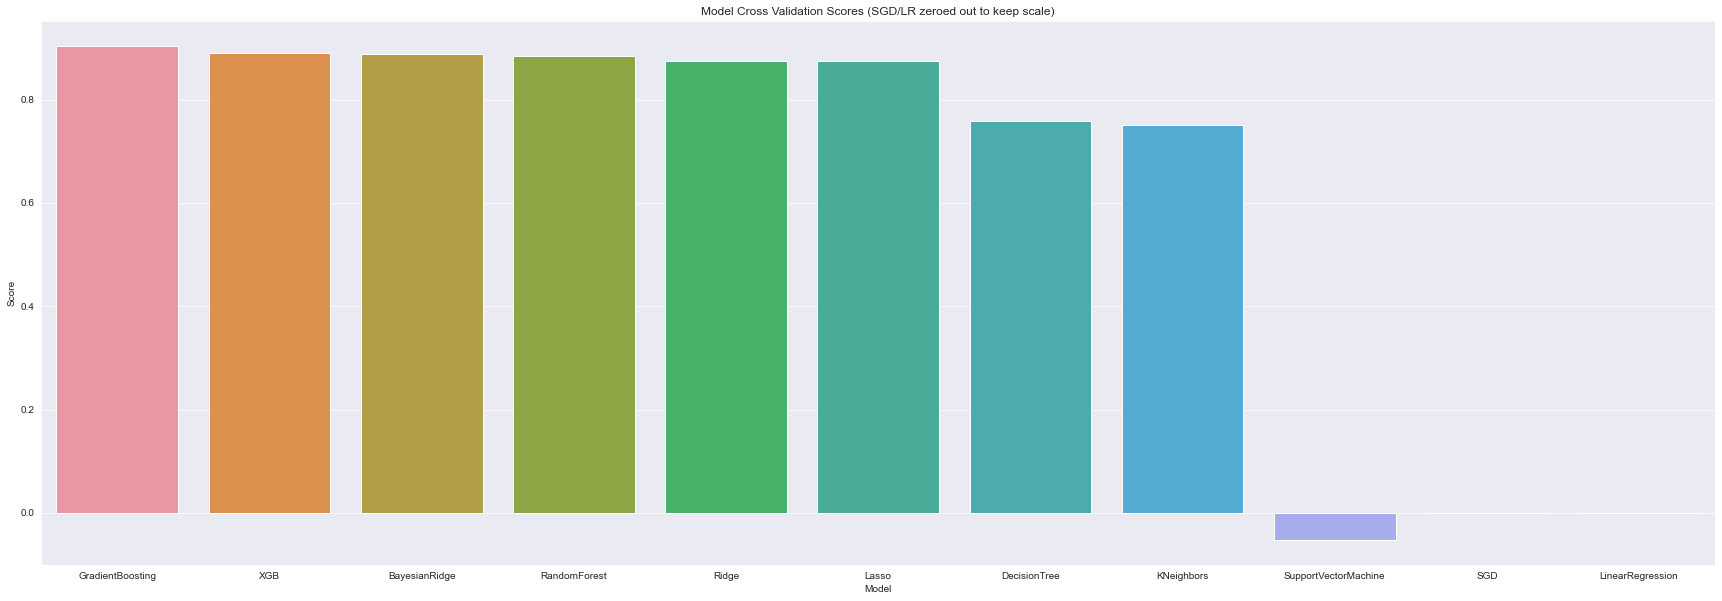

In [110]:
model_cross_score_df = pd.DataFrame({'Model':['GradientBoosting','XGB','BayesianRidge',
                                        'RandomForest','Ridge','Lasso','DecisionTree','KNeighbors','SupportVectorMachine',
                                       'SGD','LinearRegression'],
                               'Score':[0.90389663021265,0.8896486009426897,0.8876561312887217,0.8844953808191528,
                                       0.874015915600531,0.8737751004145652,0.7595324614990806,0.7510417510397359,
                                       -0.052522238982960934, 0, 0]})
plt.figure(figsize=(30, 10))
sns.barplot(x=model_cross_score_df['Model'], y=model_cross_score_df['Score']).set(title='Model Cross Validation Scores (SGD/LR zeroed out to keep scale)')
plt.show()


In [111]:
# Submission for 1/5: Decision Tree Model
import csv  

In [112]:
clf = DecisionTreeRegressor()
clf = clf.fit(model_train, y)
ds_sub = pd.DataFrame({'Id': np.arange(1461, 2921, 1),
                        'SalePrice': clf.predict(clean_test)})
ds_sub.to_csv('decision_tree_sub.csv')

#Score: 0.23509

In [113]:
# Submission for 2/5: Gradient Boosting Model

In [114]:
gbr = GradientBoostingRegressor()
gbr = gbr.fit(model_train, y)
gbr_sub = pd.DataFrame({'Id': np.arange(1461, 2921, 1),
                        'SalePrice': gbr.predict(clean_test)})
gbr_sub.to_csv('gradient_boosting_sub.csv')

#Score: 0.15781

In [115]:
# Submission for 3/5: Random Forest Regressor

In [116]:
rfreg = RandomForestRegressor(max_depth=3, random_state=0)
rfreg.fit(model_train, y)
rfreg_sub = pd.DataFrame({'Id': np.arange(1461, 2921, 1),
                        'SalePrice': rfreg.predict(clean_test)})
rfreg_sub.to_csv('random_forest_sub.csv')

#Score: 0.22221

In [117]:
# Submission for 4/5: Support Vector Machine Model

In [118]:
svm_model = svm.SVR()
svm_model.fit(model_train, y)
svm_sub = pd.DataFrame({'Id': np.arange(1461, 2921, 1),
                        'SalePrice': svm_model.predict(clean_test)})
svm_sub.to_csv('svm_sub.csv')

#Score: 0.41687

In [119]:
# Submission for 5/5: Linear Regression

In [120]:
lr = LinearRegression()
lr.fit(X=model_train, y=y)
lr_sub = pd.DataFrame({'Id': np.arange(1461, 2921, 1),
                        'SalePrice': lr.predict(clean_test)})
lr_sub.to_csv('linear_regression_sub.csv')

#Score 0.3500

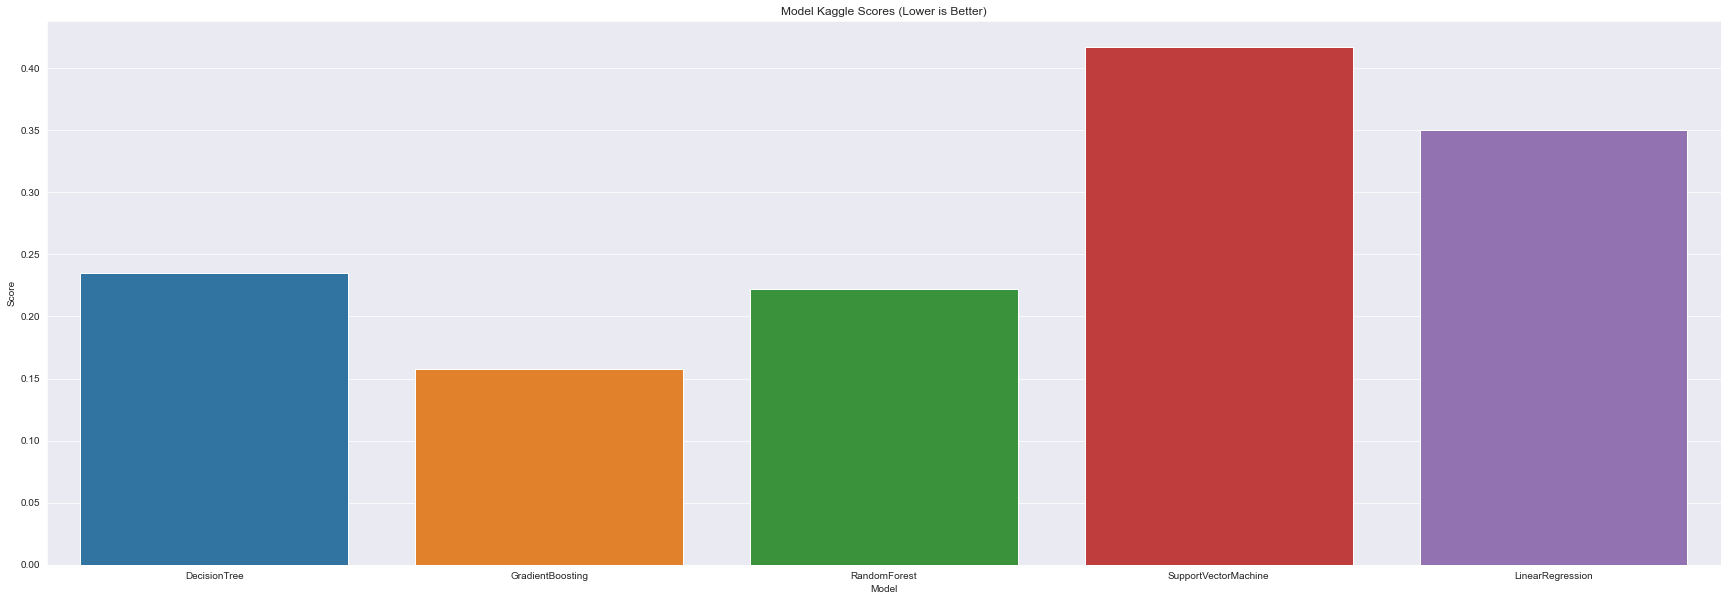

In [121]:
model_kaggle_score_df = pd.DataFrame({'Model':['DecisionTree','GradientBoosting',
                                        'RandomForest','SupportVectorMachine','LinearRegression'],
                               'Score':[0.23509,0.15781, 0.22221, 0.41687,0.3500]})
plt.figure(figsize=(30, 10))
sns.barplot(x=model_kaggle_score_df['Model'], y=model_kaggle_score_df['Score']).set(title='Model Kaggle Scores (Lower is Better)')
plt.show()


In [122]:
# END CODE